IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("4.csv")
df

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced  Performance Index  
0                                    1               91.0  
1                                    2               65.0  
2                                    2               45.0  
3                                    2               36.0  
4                                    5               66.0  
...                                ...                ...  
9995                                 2               23.0  
9996                                 5               58.0  
9997                                 5               74.0  
9998                                 0               95.0  
9999                                 1               64.0  

[10000 rows x 6 columns]

DATA PREPROCESSING

In [3]:
df.head()

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

In [4]:
df.describe()

Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max                            9.000000         100.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.shape

(10000, 6)

In [7]:
# finding if any missing values
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
# checking for duplicates
df.duplicated().sum()

np.int64(127)

In [9]:
# removing the duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(9873, 6)

FEATURE ENGINEERING (INTRODUCING NEW FEATURES INTO THE DATASET)

In [11]:
# Create Study Efficiency Index
df['Study Efficiency Index'] = (
    df['Hours Studied'] * df['Sample Question Papers Practiced'] / df['Sleep Hours']
)

window_size = 3  # Adjust the window size as needed
df['Consistency Score'] = df['Previous Scores'].rolling(window=window_size, min_periods=1).mean()

# Display updated DataFrame
print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  \
0                                 1               91.0   
1                                 2               65.0   
2                                 2               45.0   
3                                 2               36.0   
4                                 5               66.0   

   Study Efficiency Index  Consistency Score  
0                0.777778          99.000000  
1                2.000000          90.500000  
2                2.285714          77.333333  


OUTLIER DETECTION AND TREATMENT

In [12]:
def replace_outliers_with_median_iqr(df, columns):
    df_cleaned = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        median = df[column].median()
        # Replace outliers with median
        df_cleaned[column] = np.where(
            (df[column] < lower_bound) | (df[column] > upper_bound),
            median,
            df[column]
        )
    return df_cleaned

num_cols = df.select_dtypes(include=np.number).columns
df = replace_outliers_with_median_iqr(df, num_cols)

ENCODING CATEGORICAL COLUMNS

In [13]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical features using Label Encoding( YES-'1', NO-'0')
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

EXPLORATORY DATA ANALYSIS

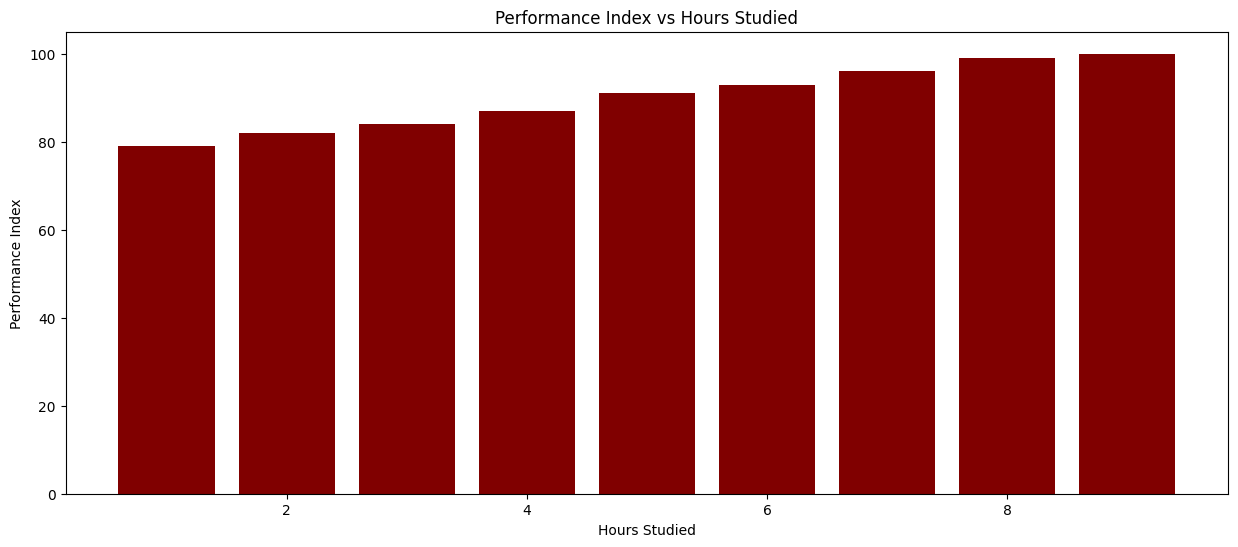

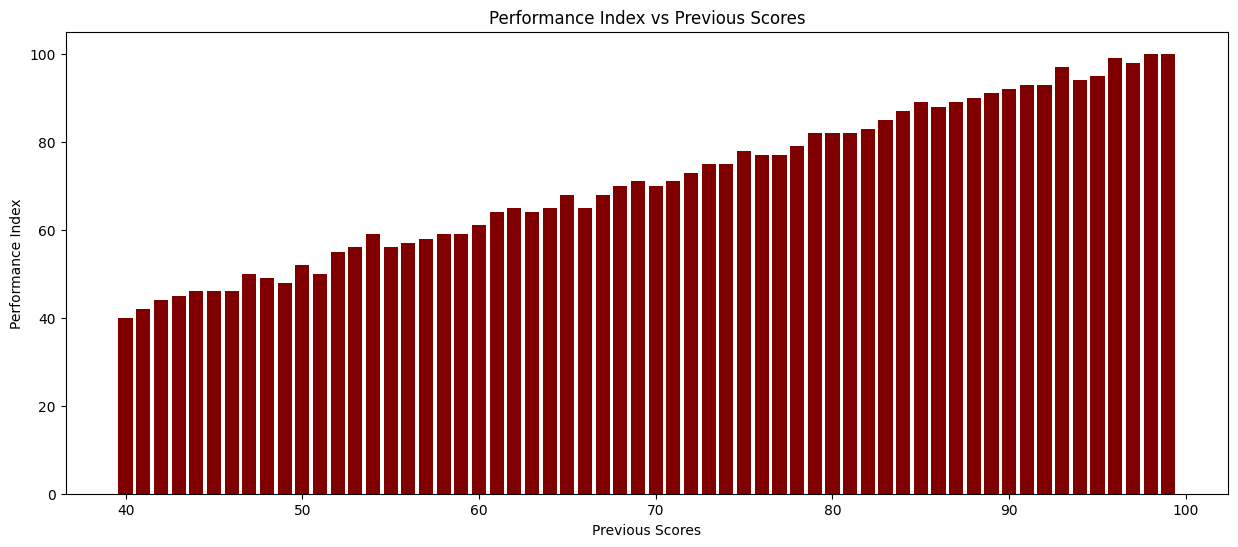

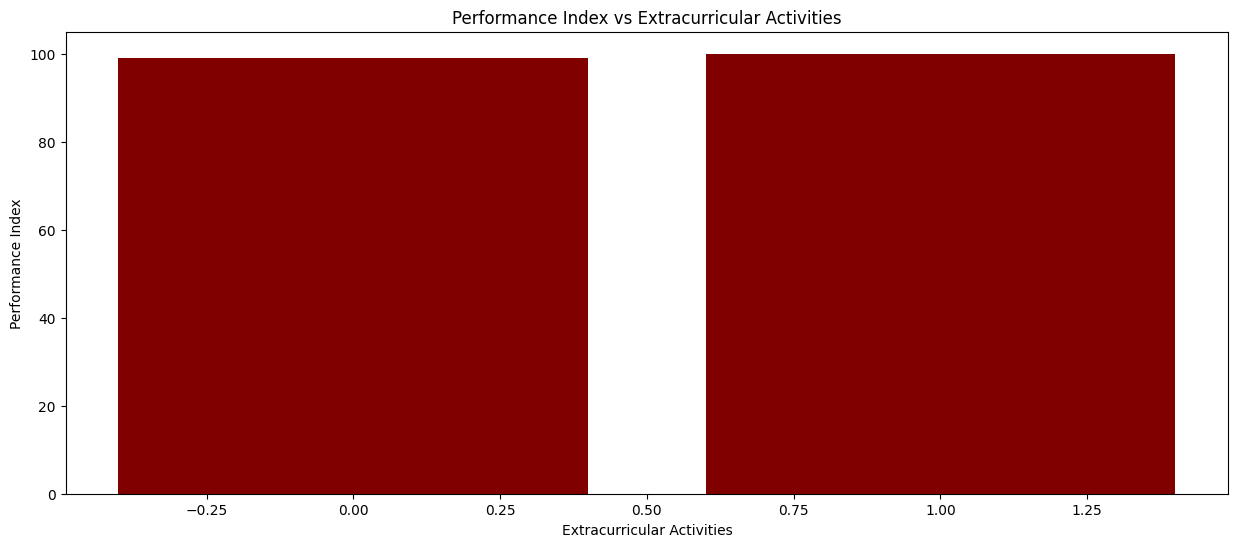

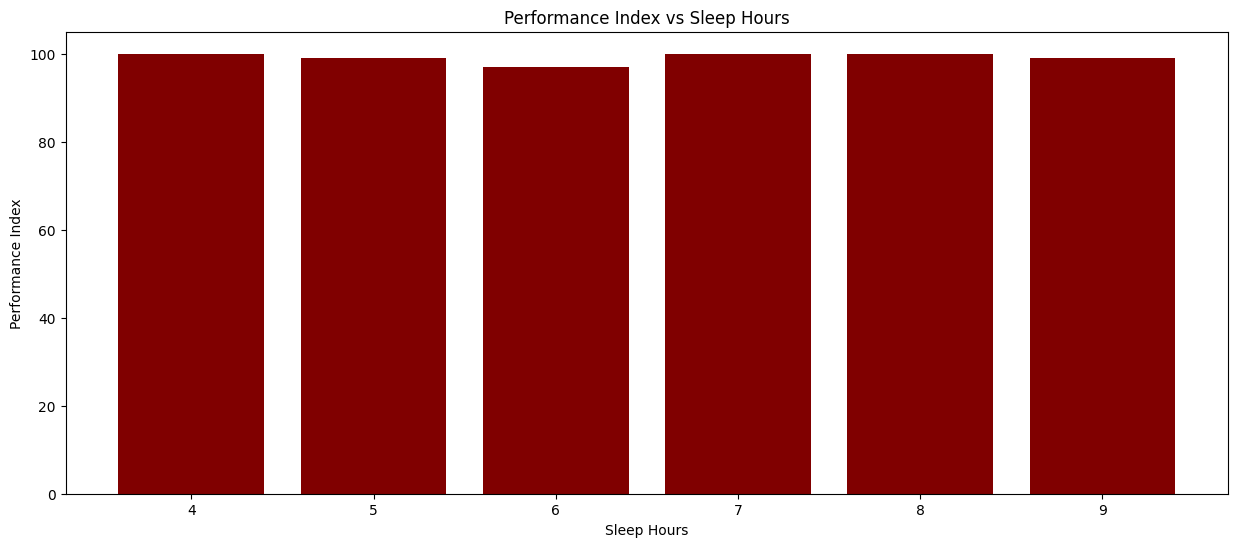

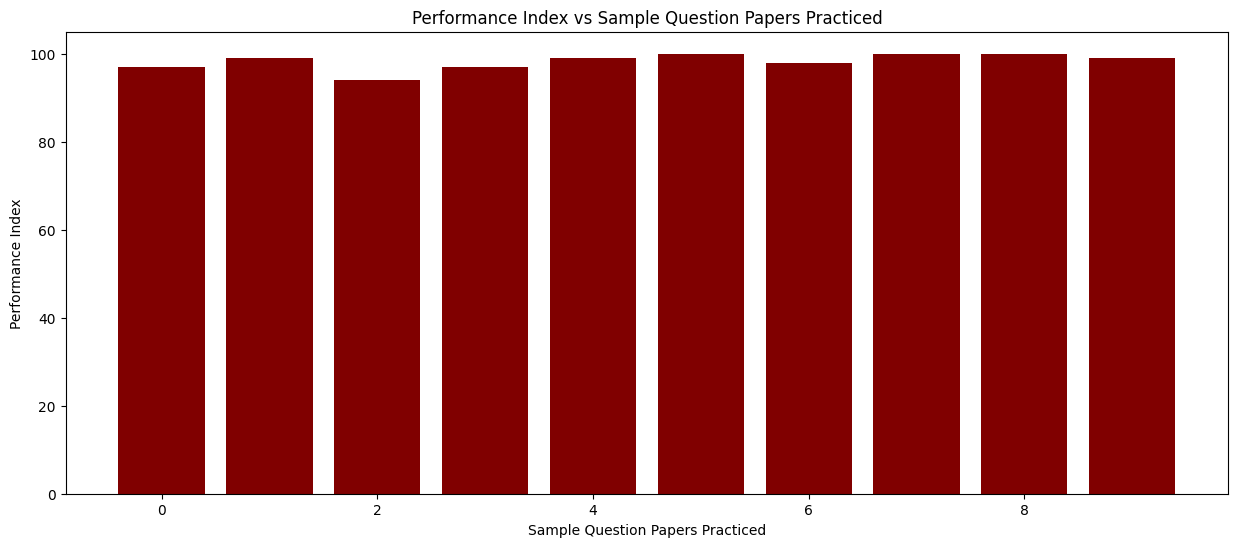

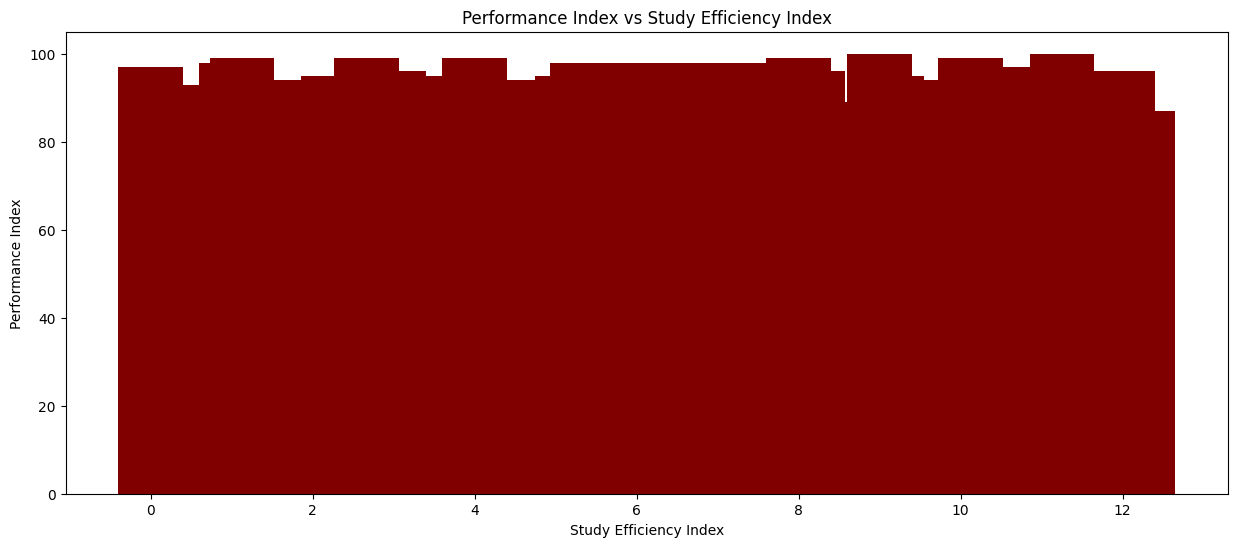

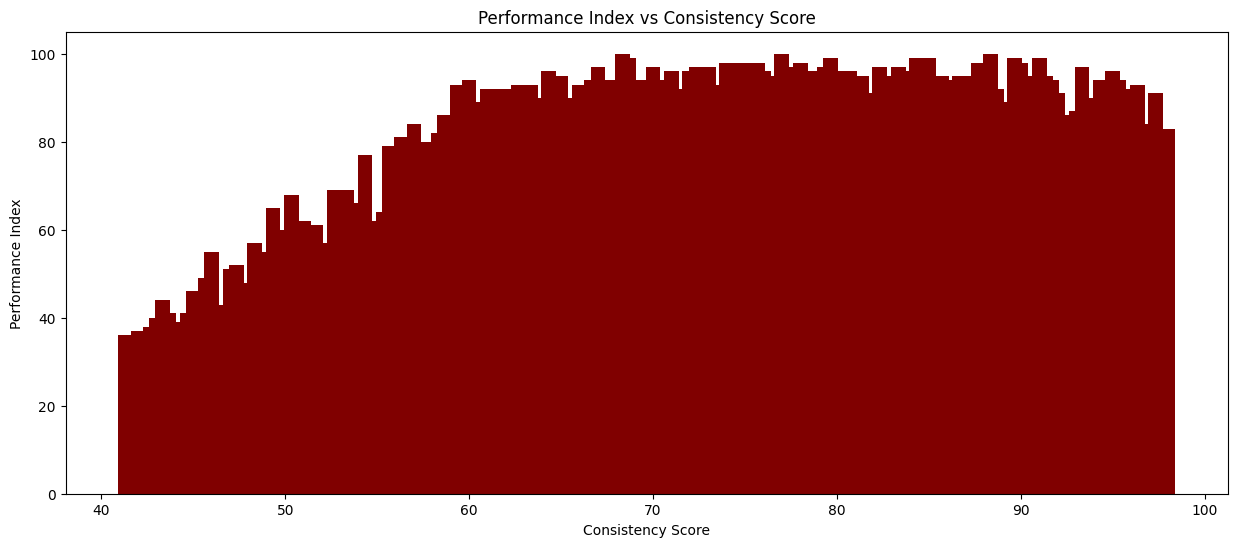

In [14]:
# finding relations between performance index and the other columns (using bar graphs)
for col in df.columns:
    if (col=='Performance Index'):
        continue
    # bar graphs
    plt.figure(figsize=(15, 6))
    plt.bar(df[col], df['Performance Index'], color='maroon')
    plt.xlabel(f"{col}")
    plt.ylabel('Performance Index')
    plt.title(f"Performance Index vs {col}")
    plt.show()

Observations:
1. No particular relation between (Extracurricular Activities, Sleep Hours, Sample Question Papers Practiced, Study Efficiency Index, Consistency Score) and Performance Index
2. Performance Index increases with the number of hours studied.
3. Previous Scores is closely related to Performance Index

Mutual Information Based Ranking

Feature Importances based on Mutual Information:
                            Feature  Importance
1                   Previous Scores    0.927582
6                 Consistency Score    0.174960
0                     Hours Studied    0.153152
5            Study Efficiency Index    0.049686
2        Extracurricular Activities    0.005999
4  Sample Question Papers Practiced    0.000000
3                       Sleep Hours    0.000000


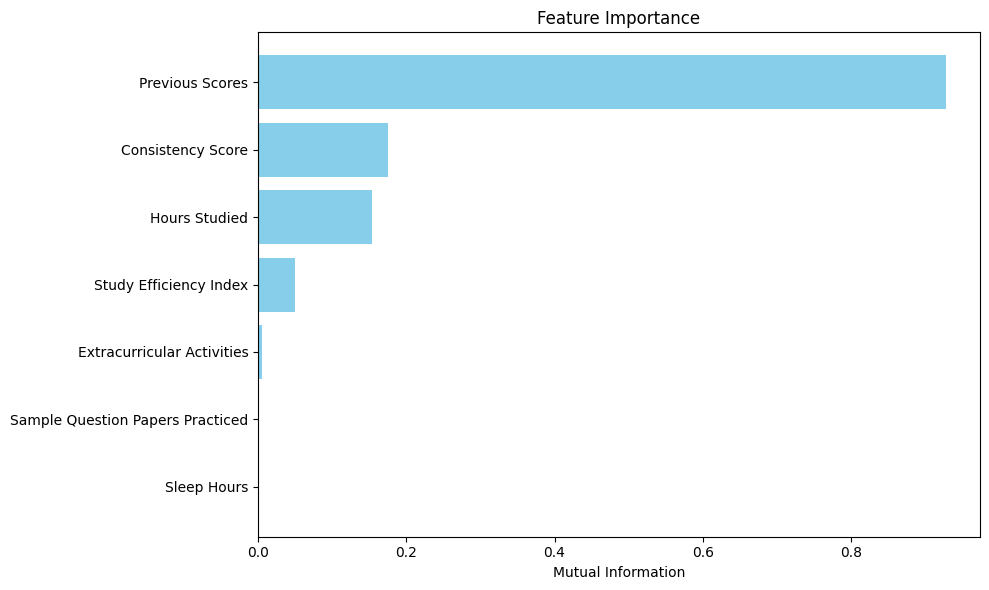

In [15]:
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

# Calculate mutual information
mutual_info = mutual_info_regression(X, y, random_state=0)

# Create DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': mutual_info
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances based on Mutual Information:")
print(feature_importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Mutual Information')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Select top N features
n_features = 5
selected_features = feature_importance_df['Feature'].iloc[:n_features].tolist()

# Create new DataFrame with selected features
X_selected = X[selected_features]

# Now X_selected is ready for model training


HISTOGRAMS

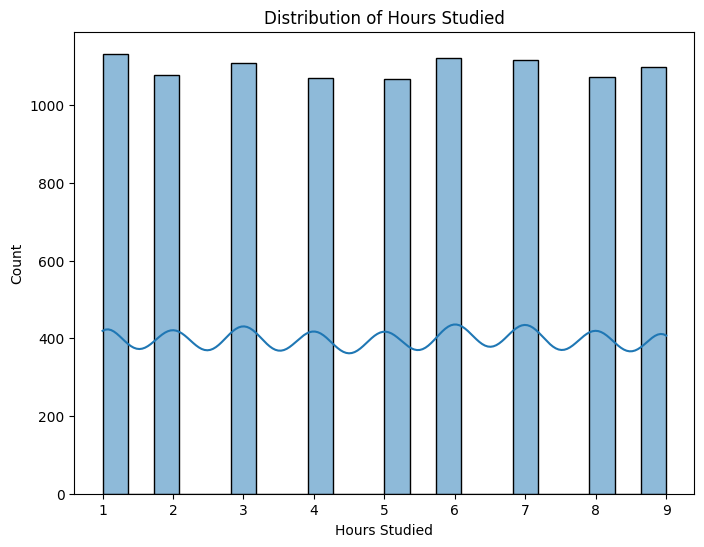

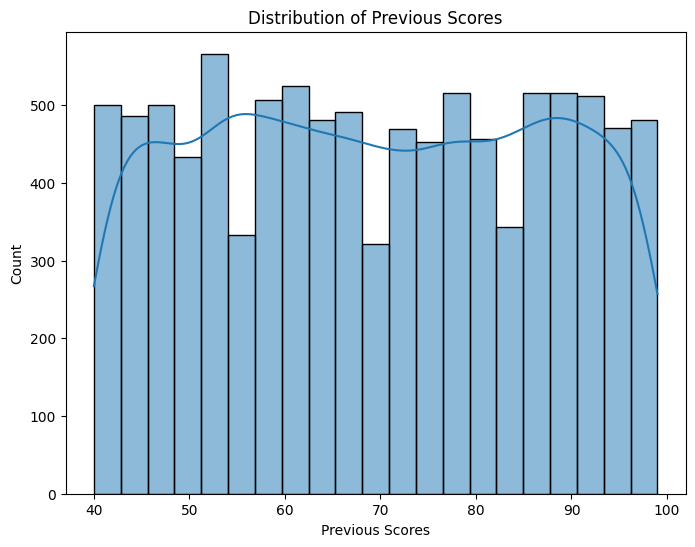

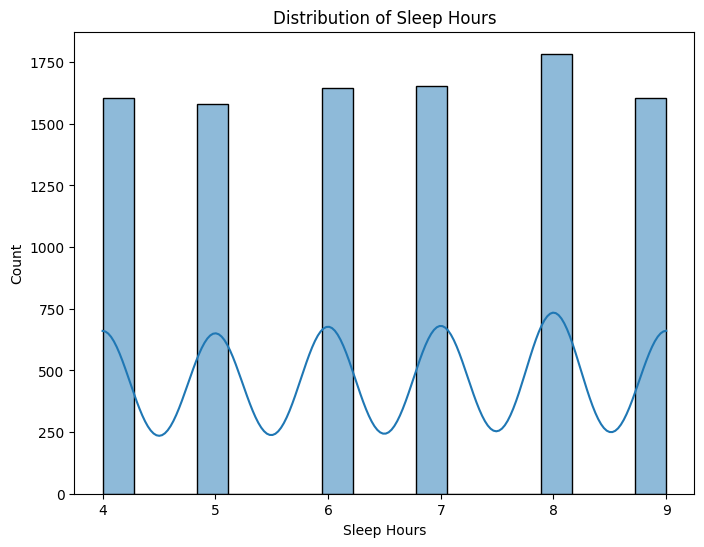

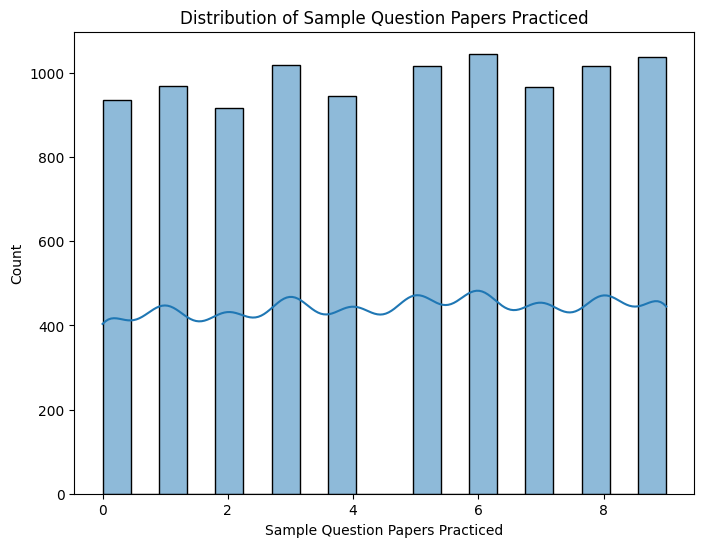

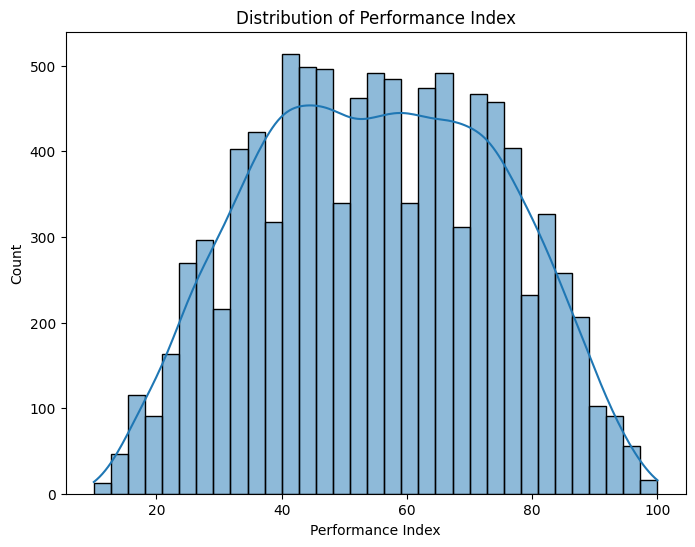

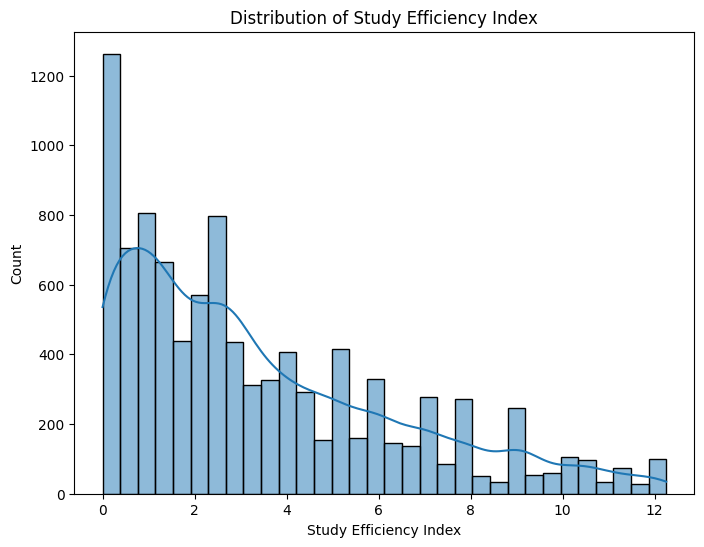

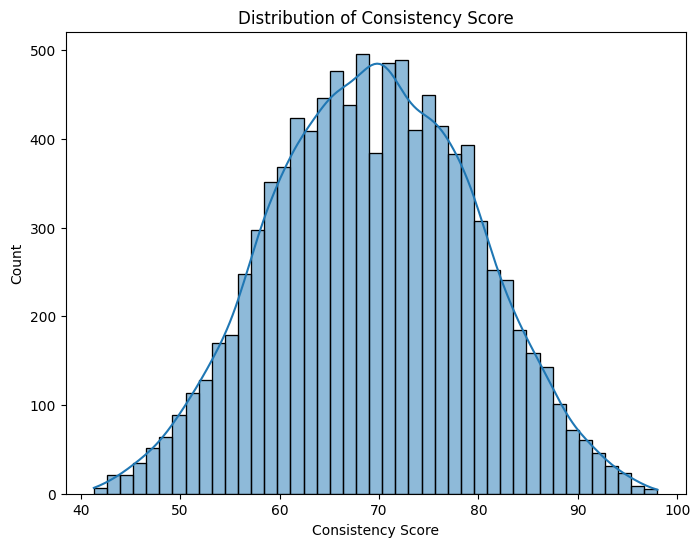

In [16]:
for col in df.select_dtypes(include=np.number):
    if (col=="Extracurricular Activities"):
        continue
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

BOX PLOTS

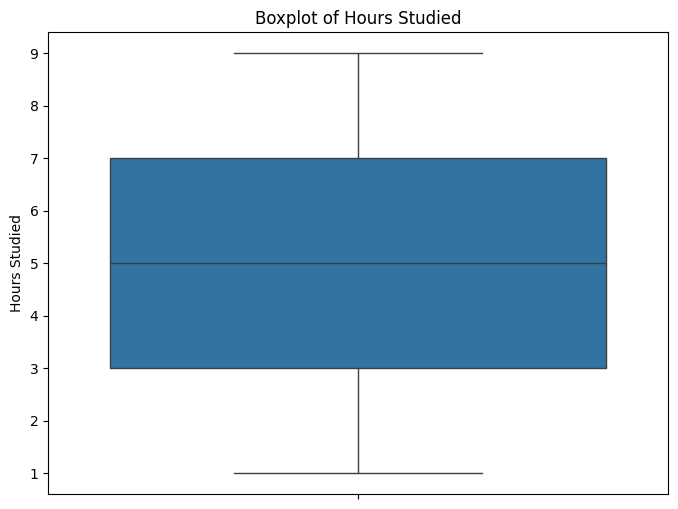

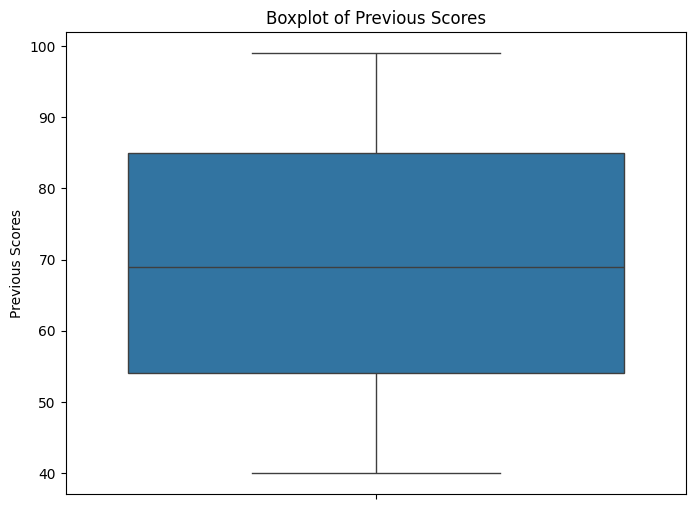

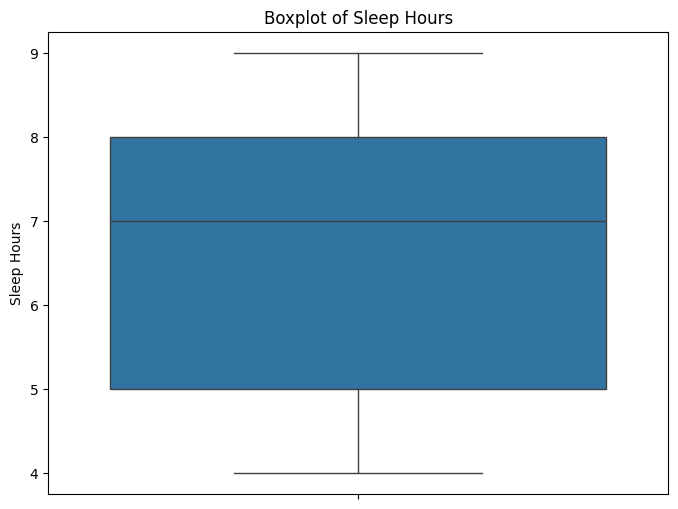

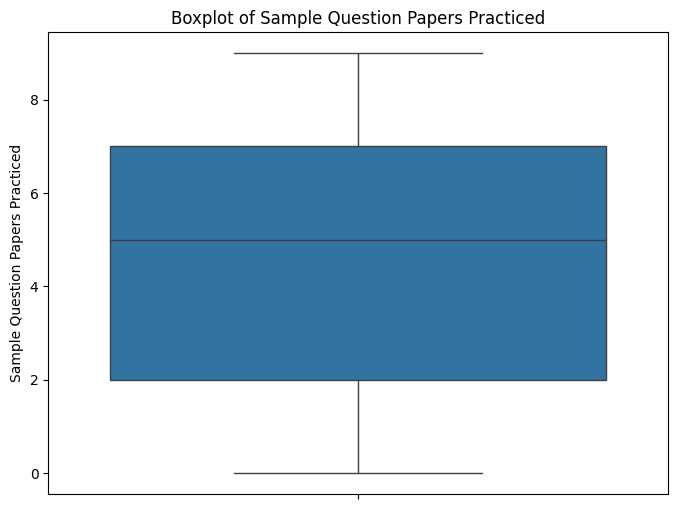

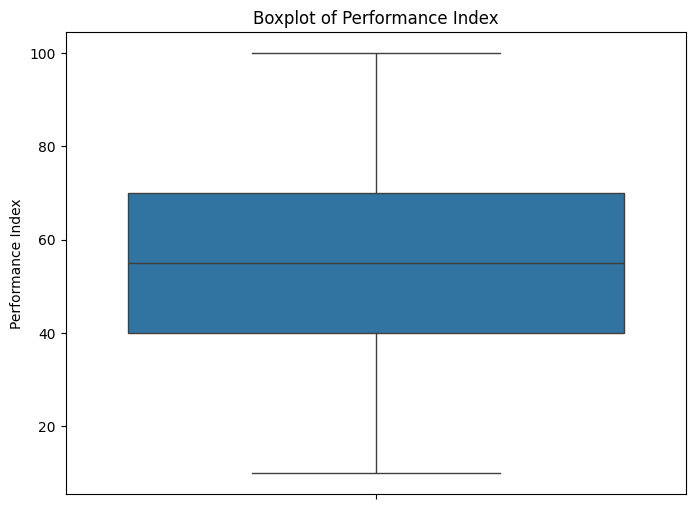

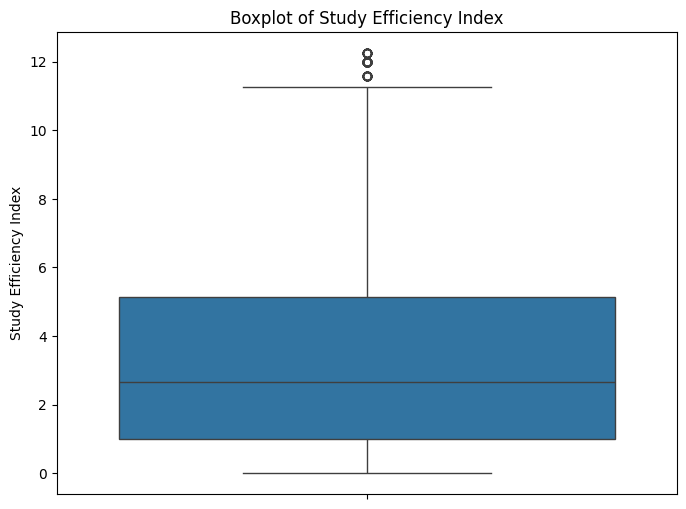

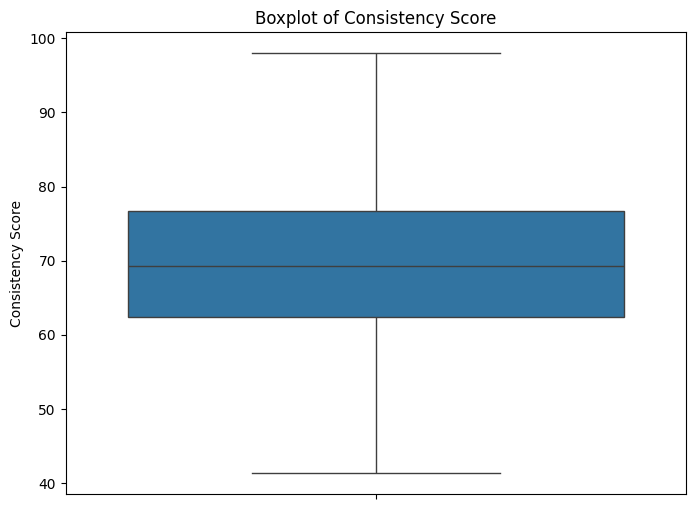

In [17]:
for col in df.select_dtypes(include=np.number):
    if (col=="Extracurricular Activities"):
        continue
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])  # Vertical boxplot
    plt.title(f'Boxplot of {col}')
    plt.show()

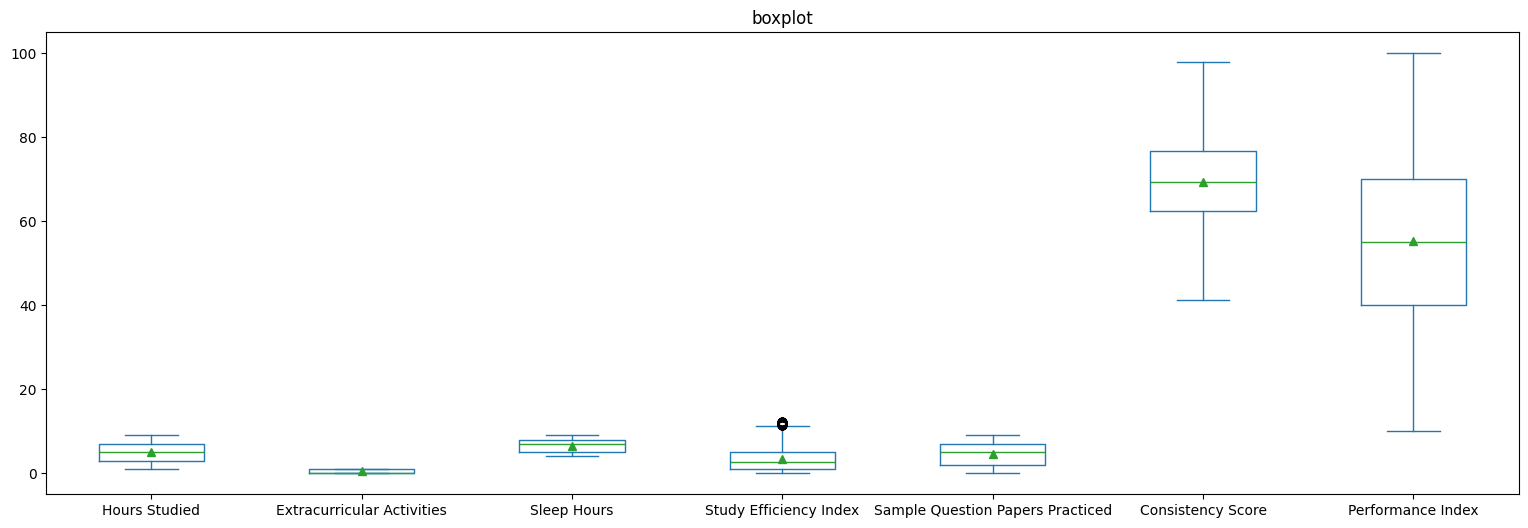

In [18]:
#Plotting the Combined Boxplot.
plt.rcParams['figure.figsize']=(19,6)
ax = df[['Hours Studied', 'Extracurricular Activities',
       'Sleep Hours','Study Efficiency Index', 'Sample Question Papers Practiced','Consistency Score', 'Performance Index']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

BIVARIATE ANALYSIS (SCATTER PLOTS)

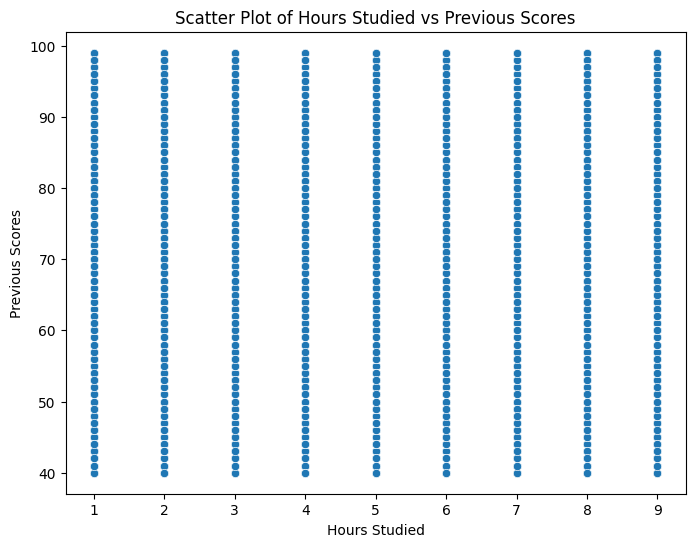

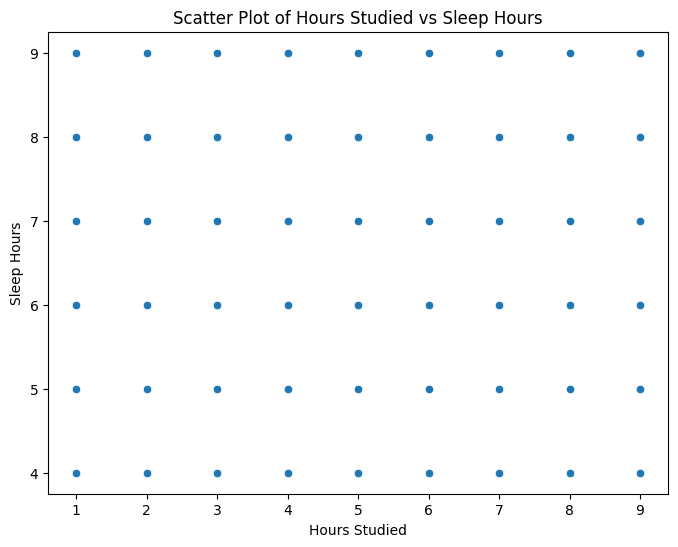

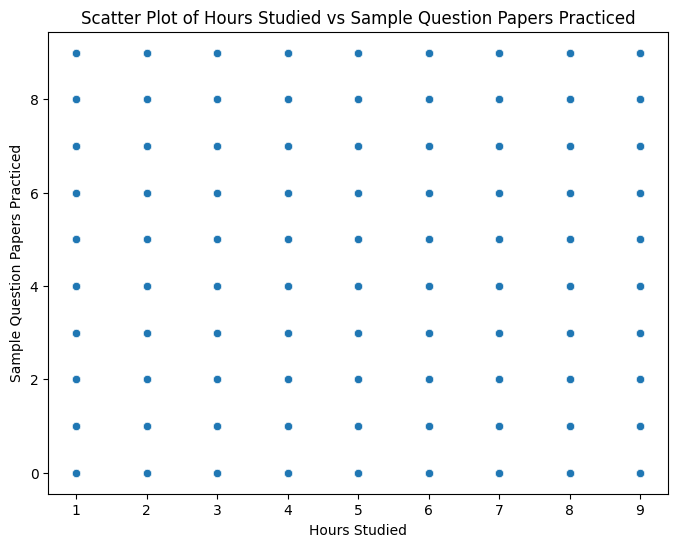

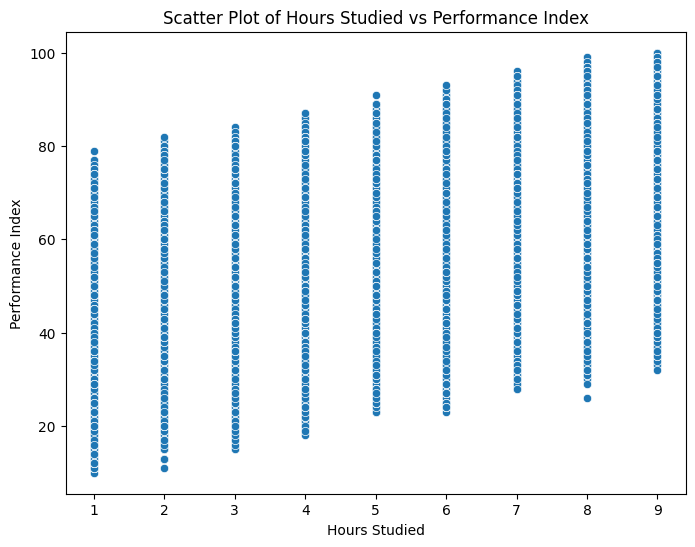

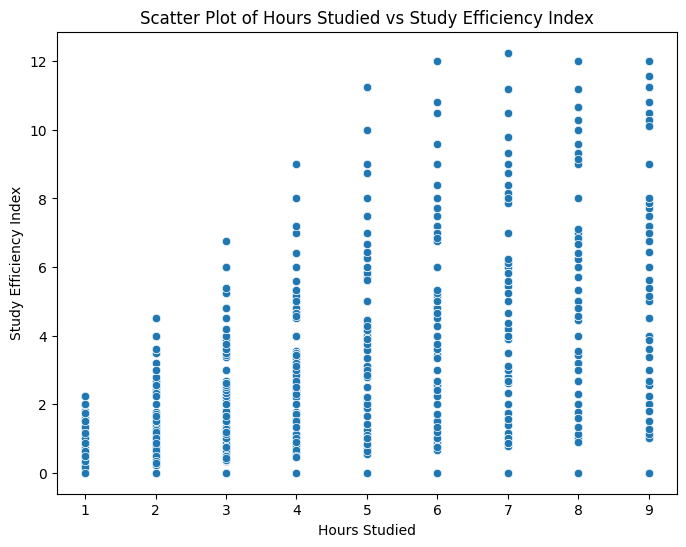

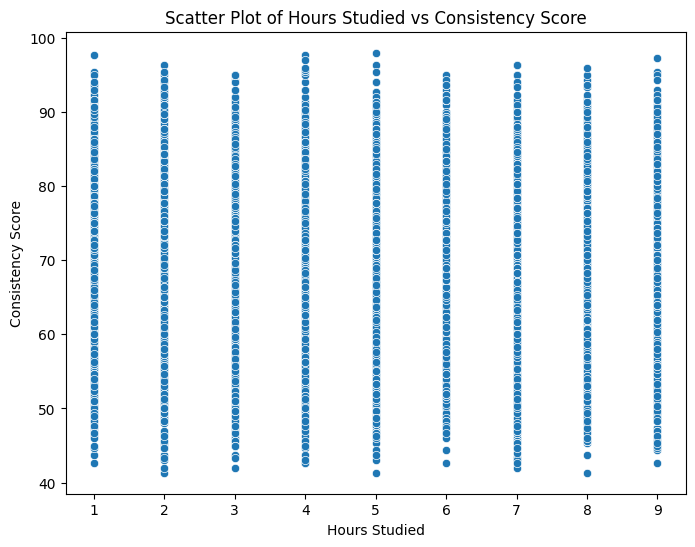

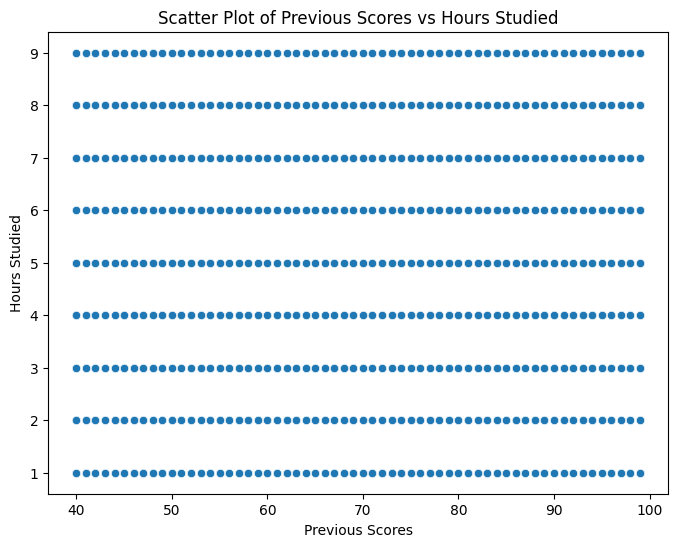

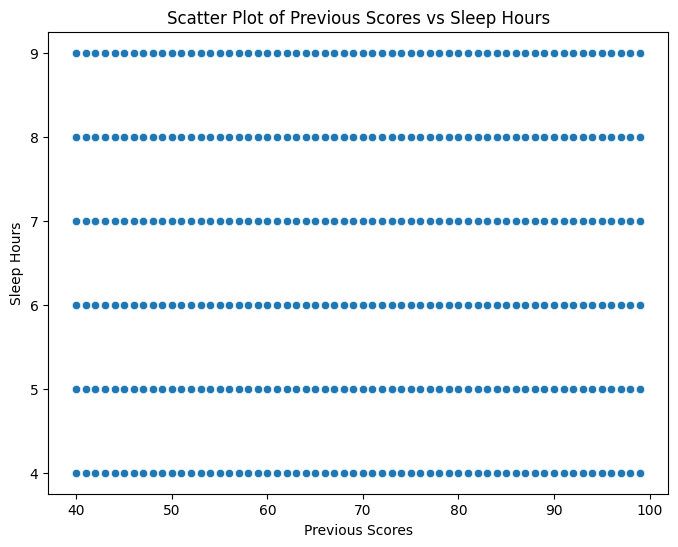

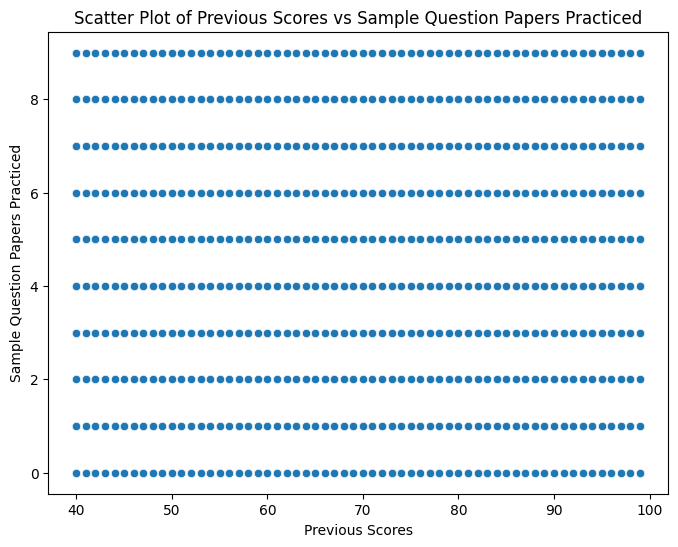

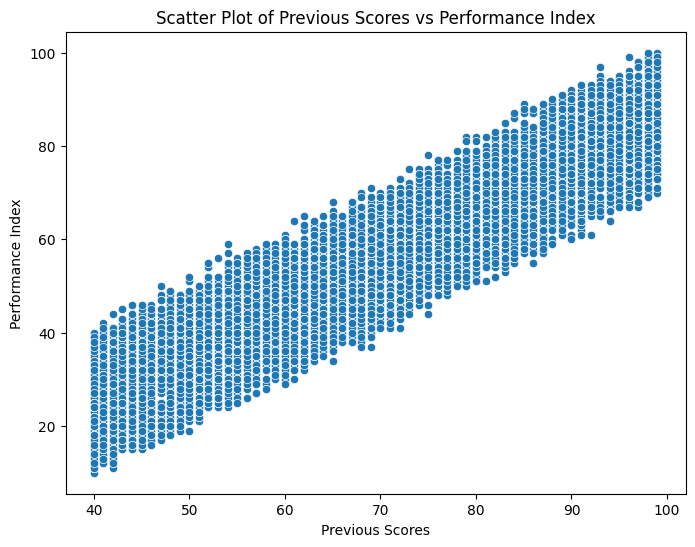

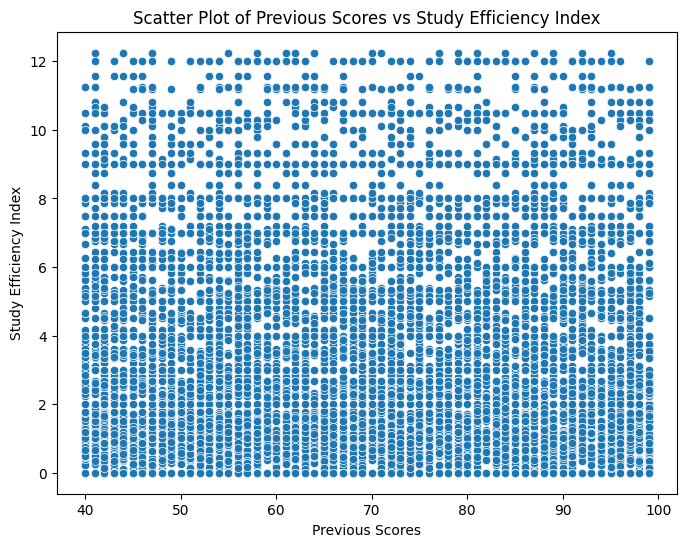

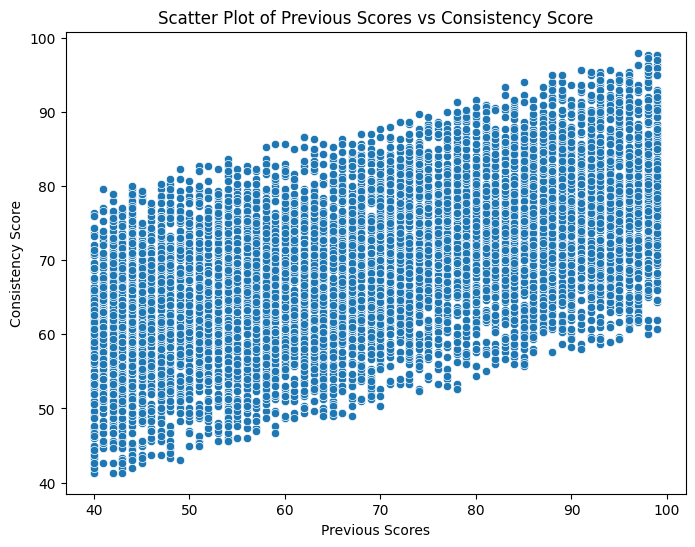

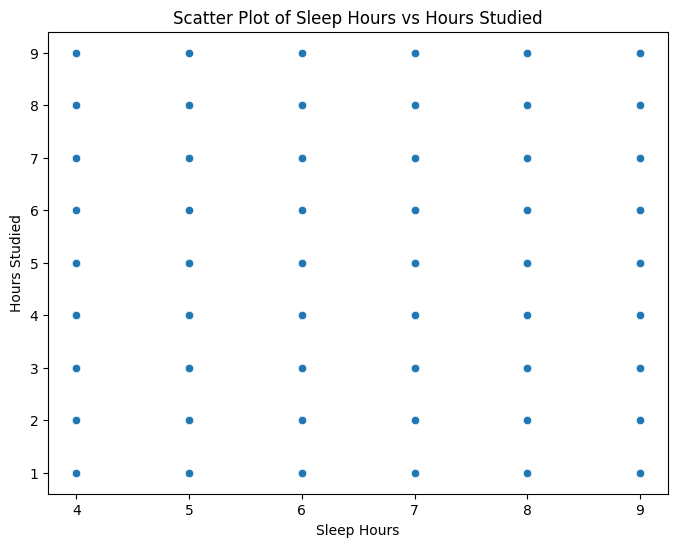

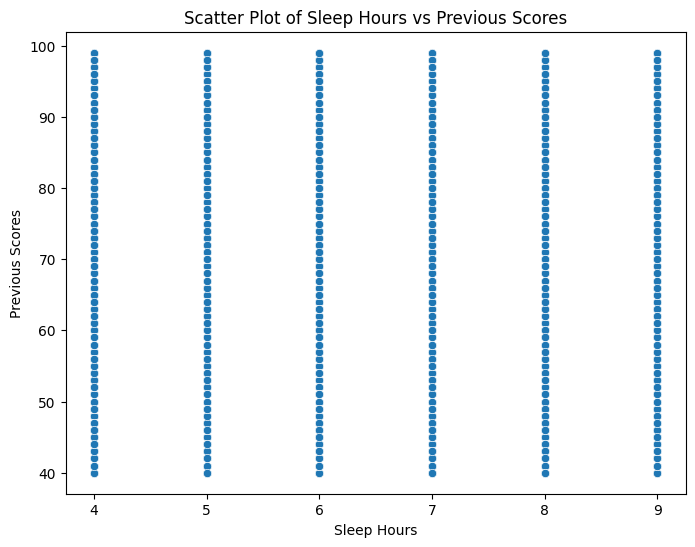

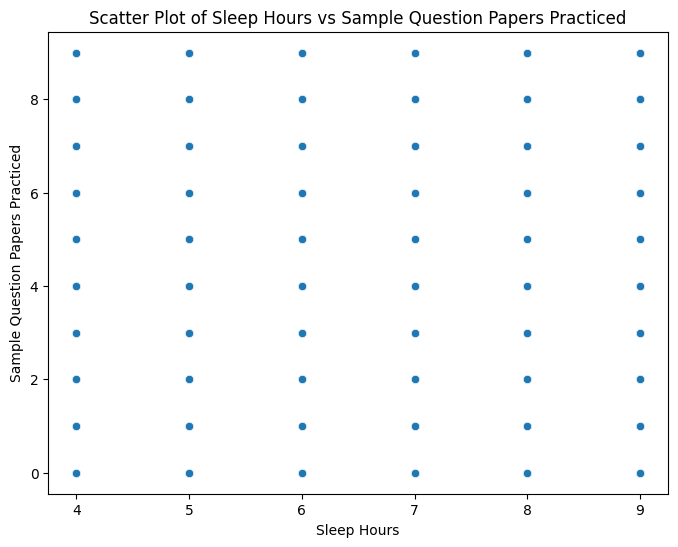

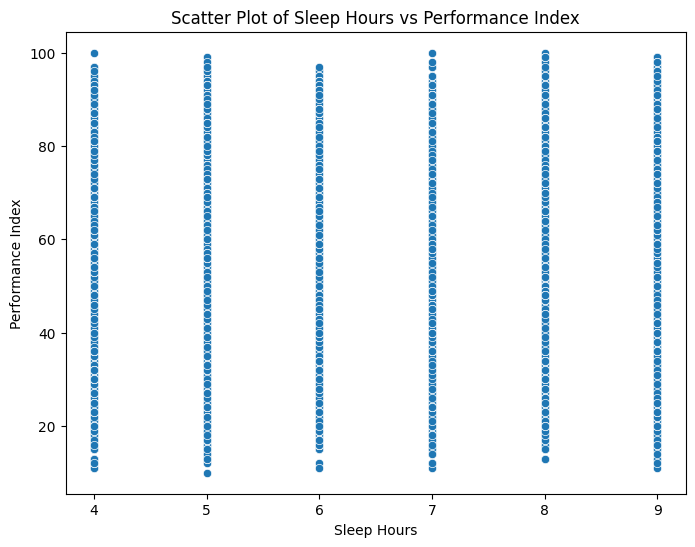

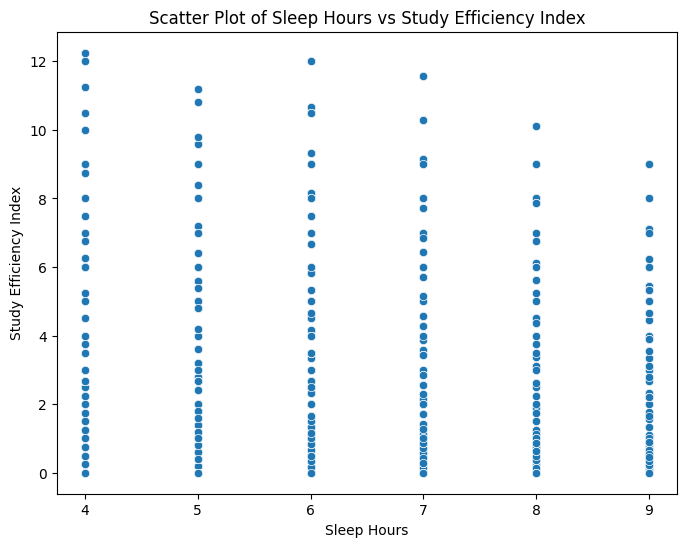

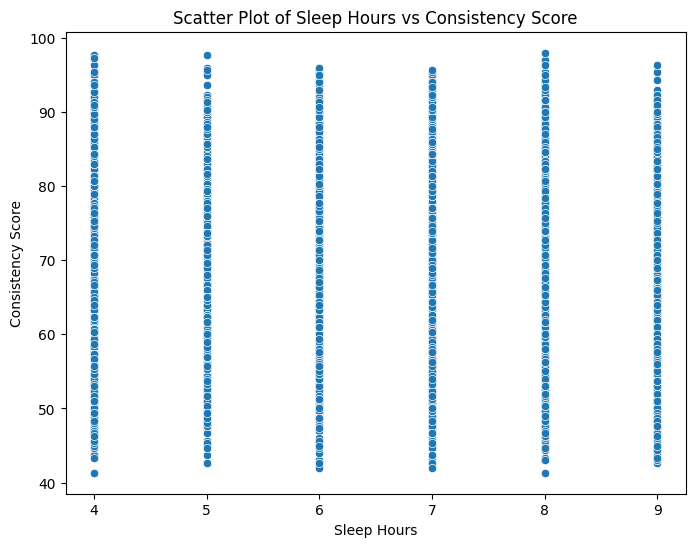

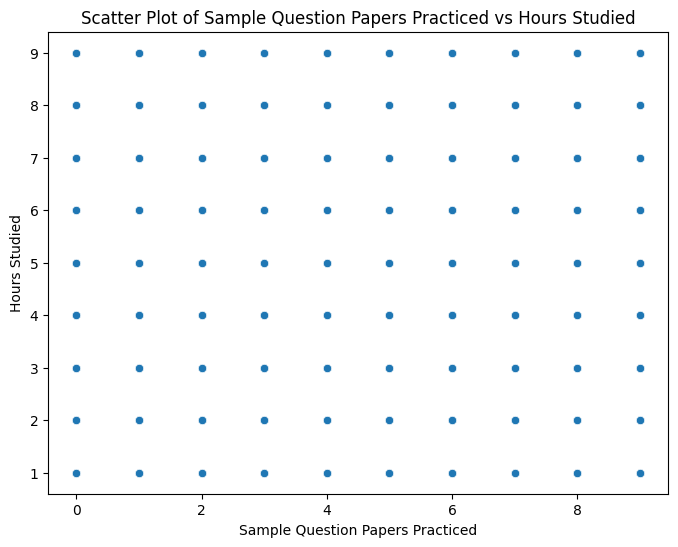

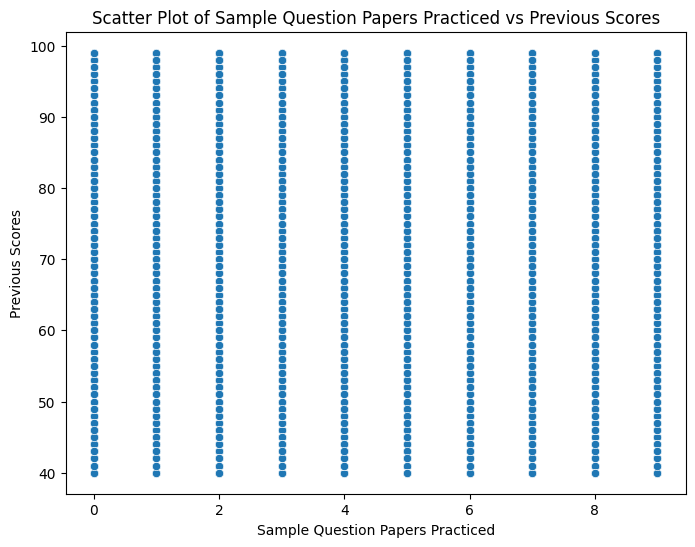

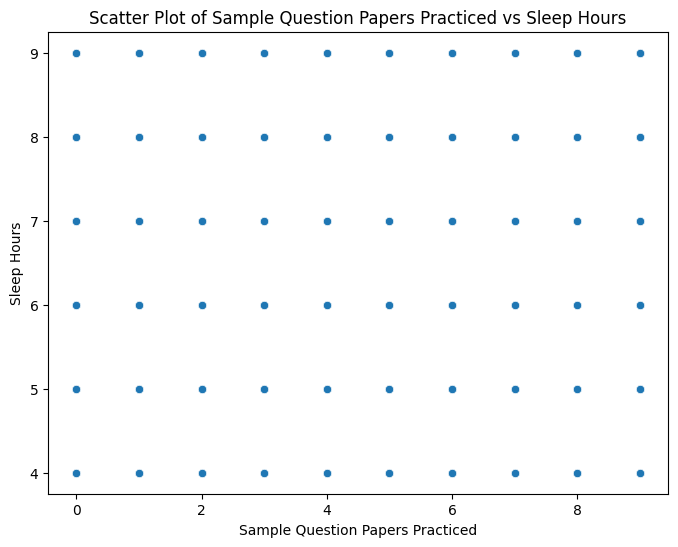

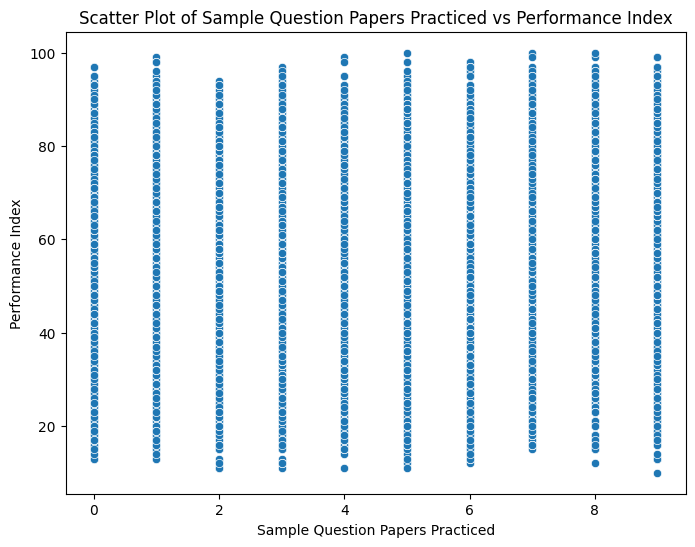

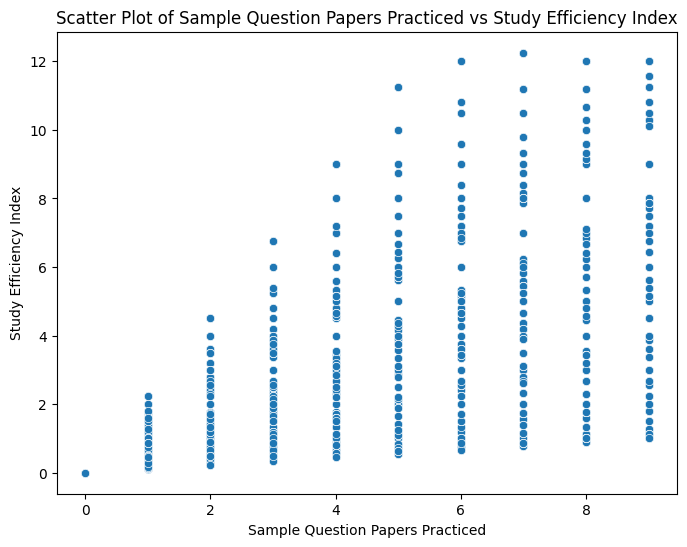

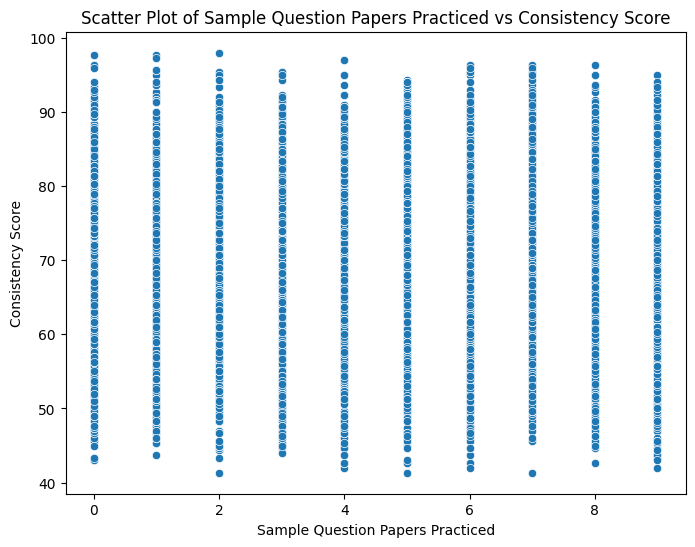

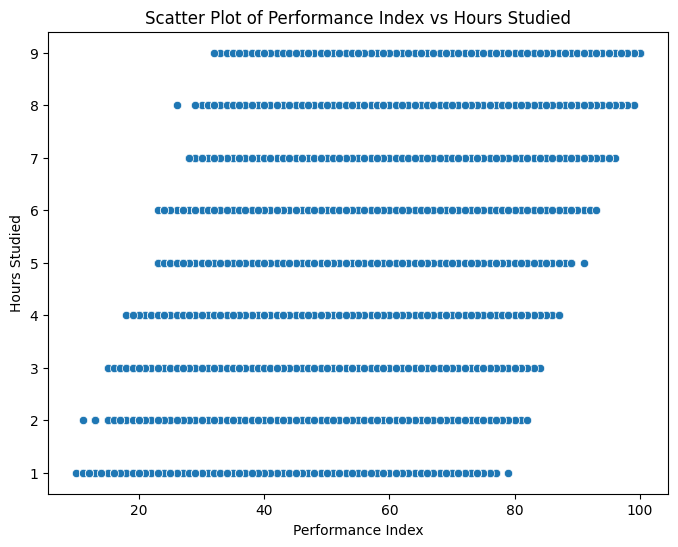

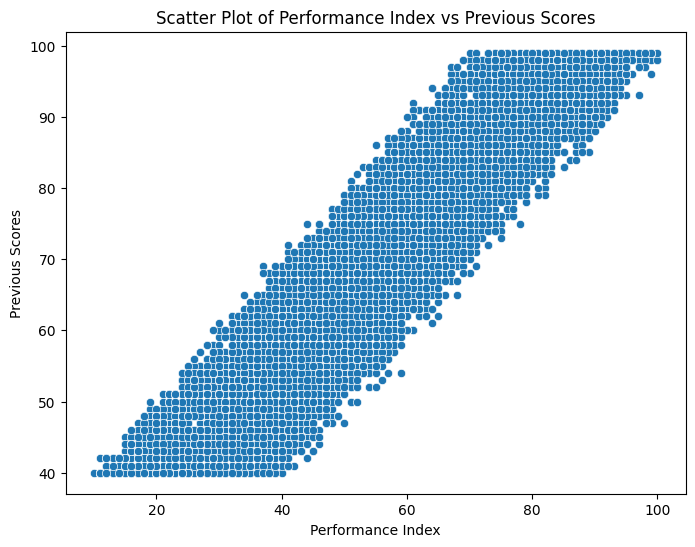

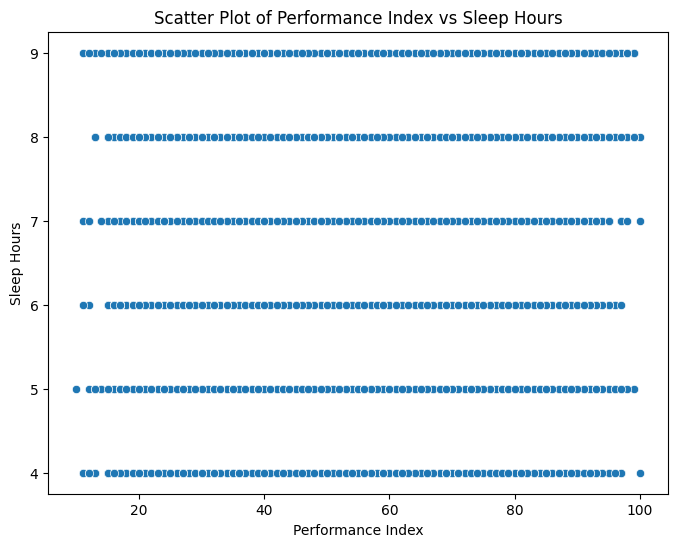

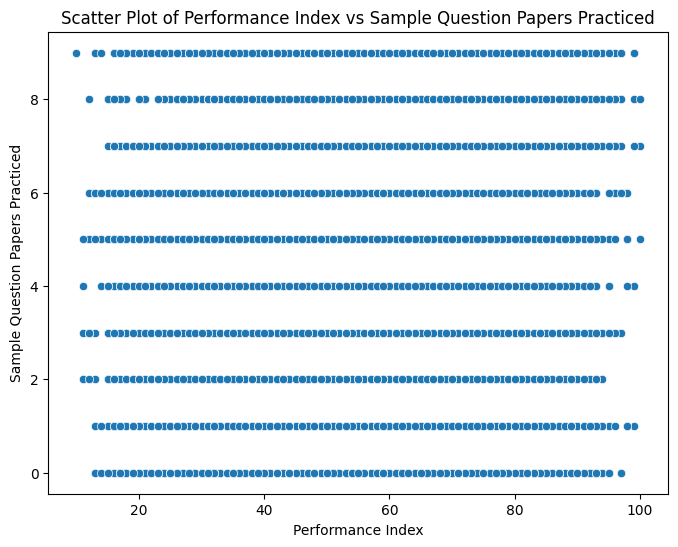

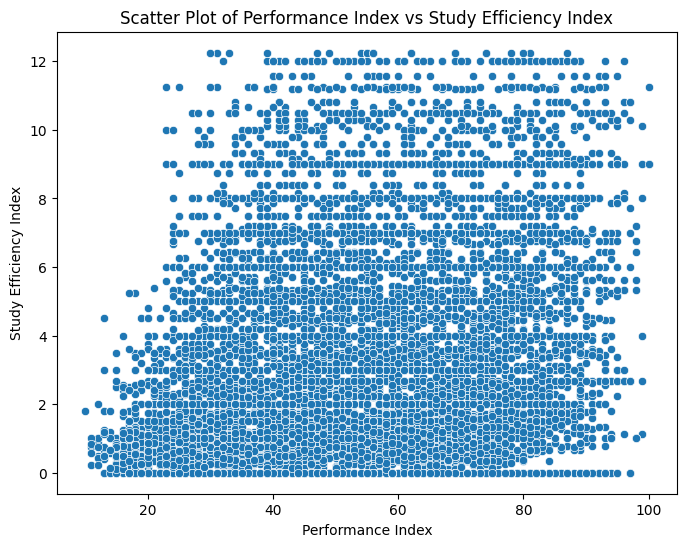

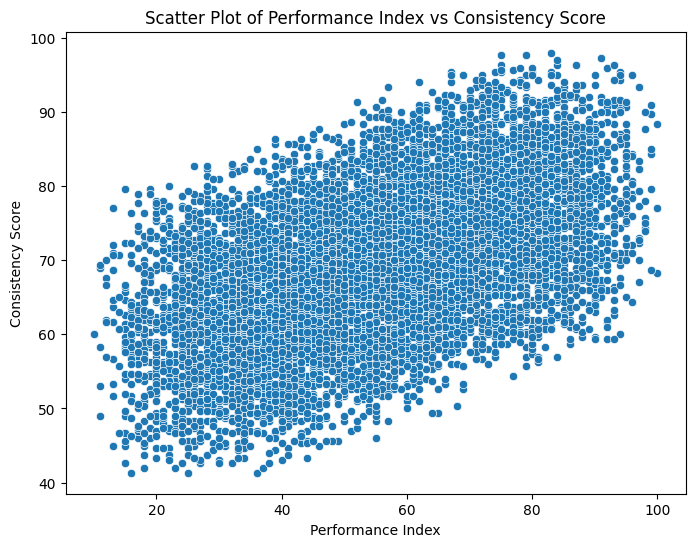

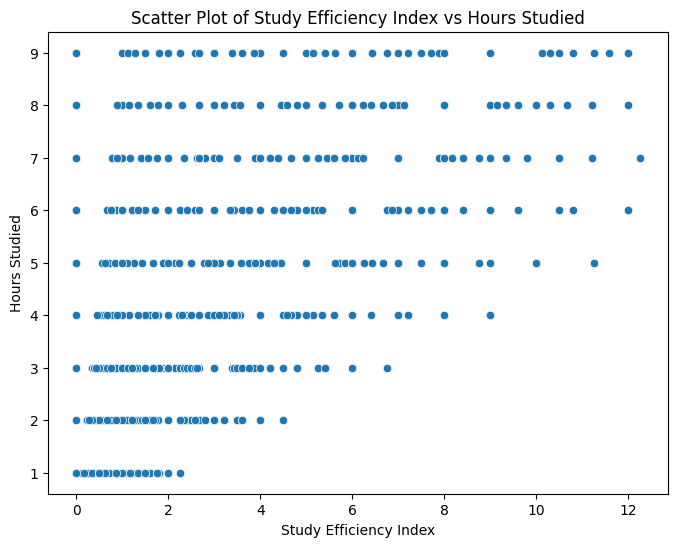

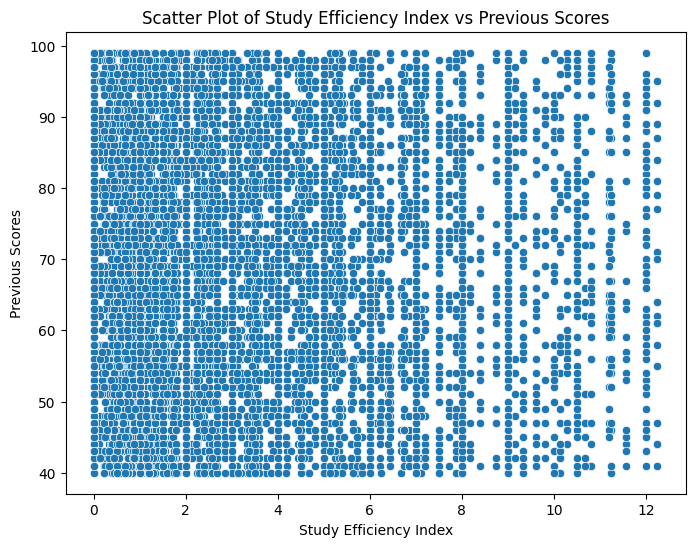

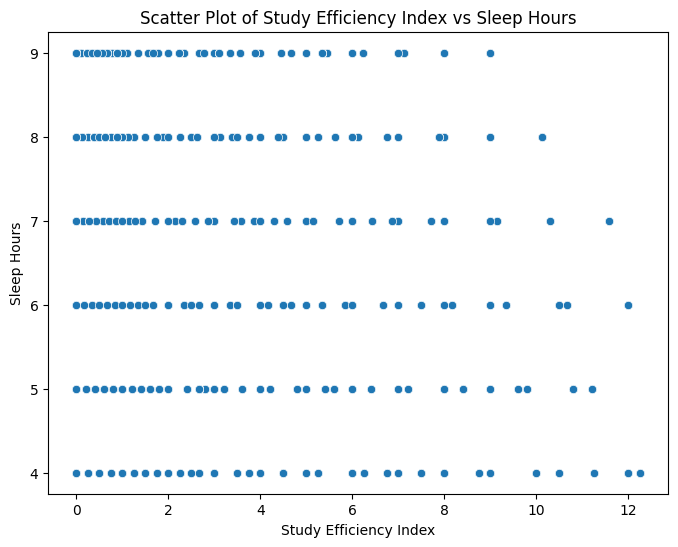

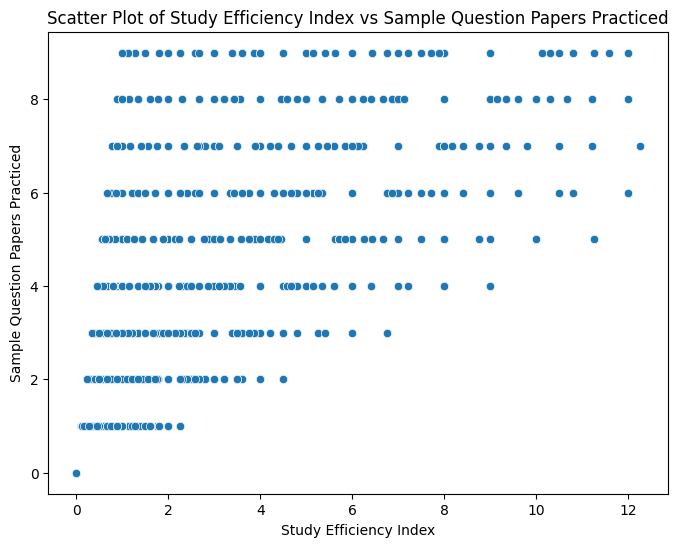

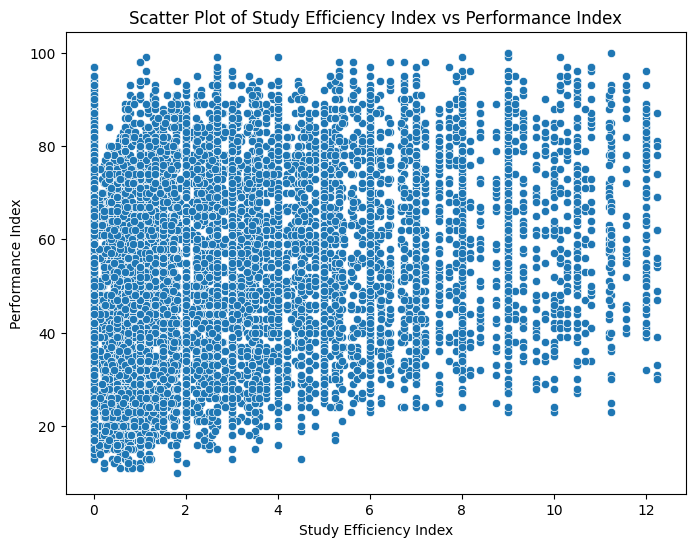

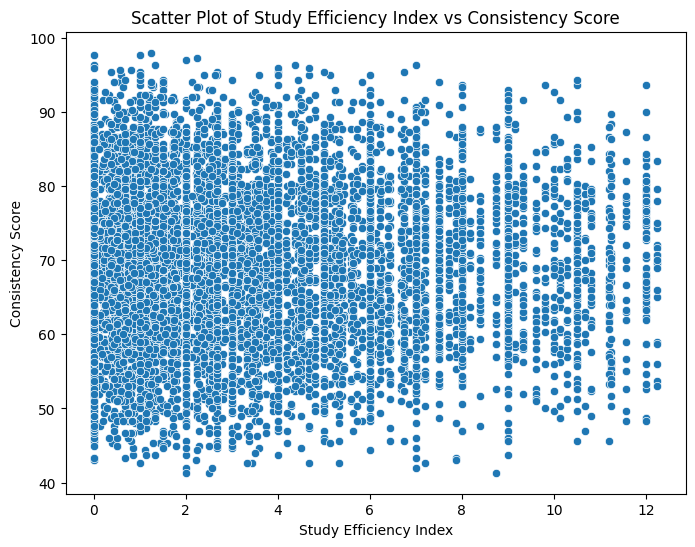

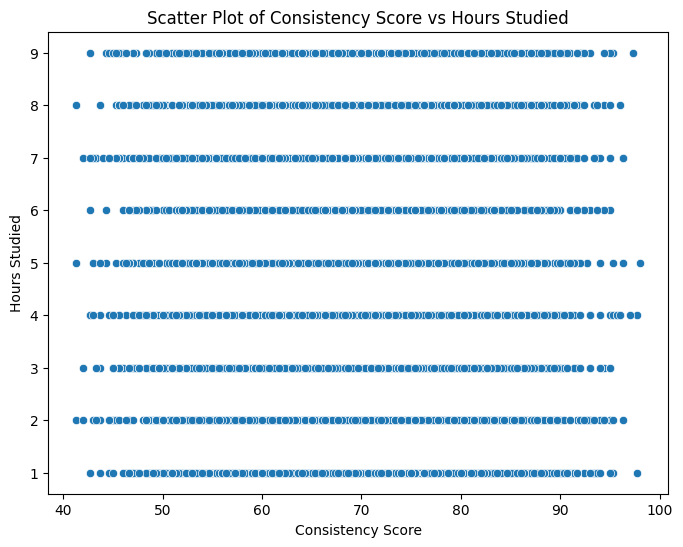

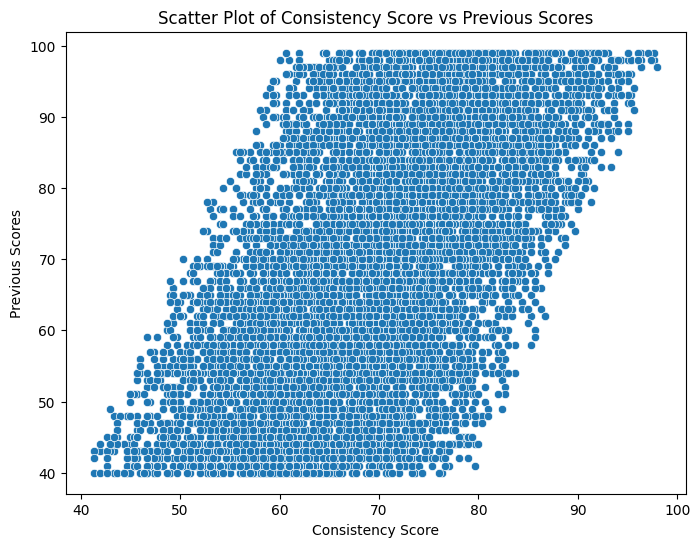

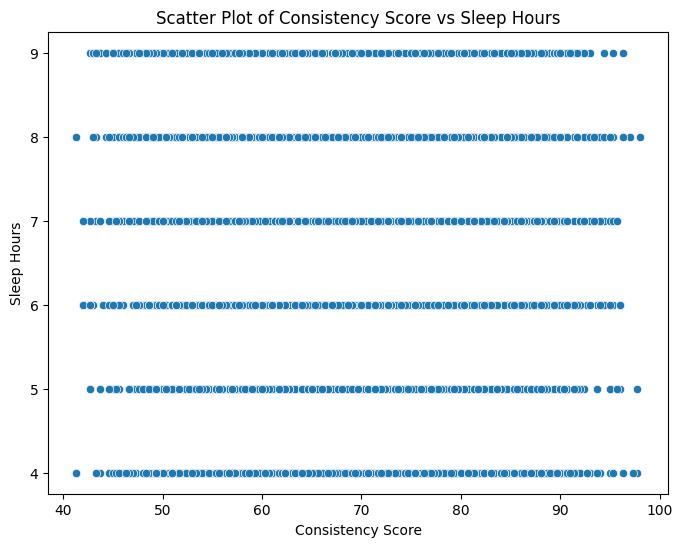

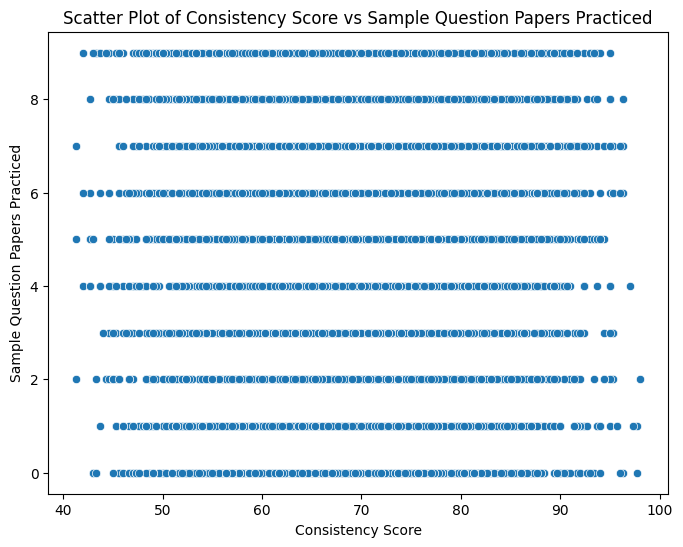

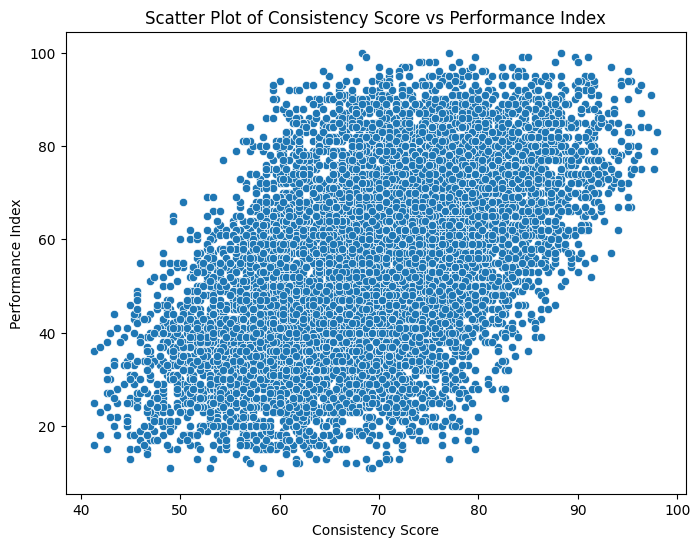

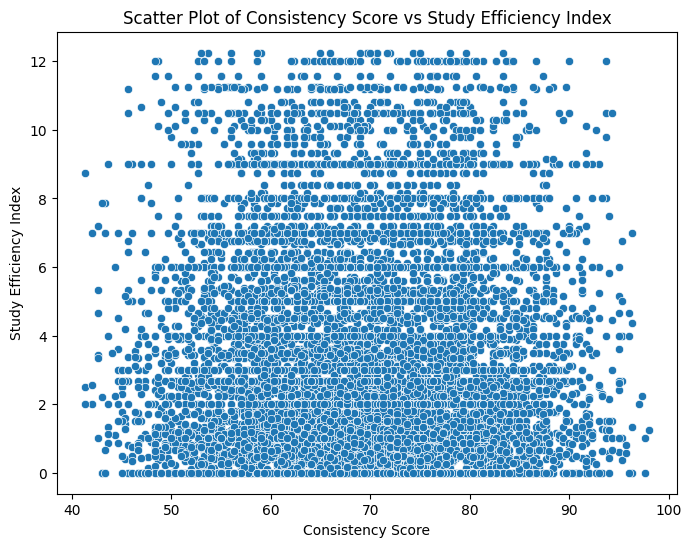

In [19]:
for col1 in df.select_dtypes(include=np.number):
    for col2 in df.select_dtypes(include=np.number):
        if (col1=="Extracurricular Activities"):
            continue
        if (col2=="Extracurricular Activities"):
            continue
        if col1 != col2:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=df[col1], y=df[col2])
            plt.title(f'Scatter Plot of {col1} vs {col2}')
            plt.show()

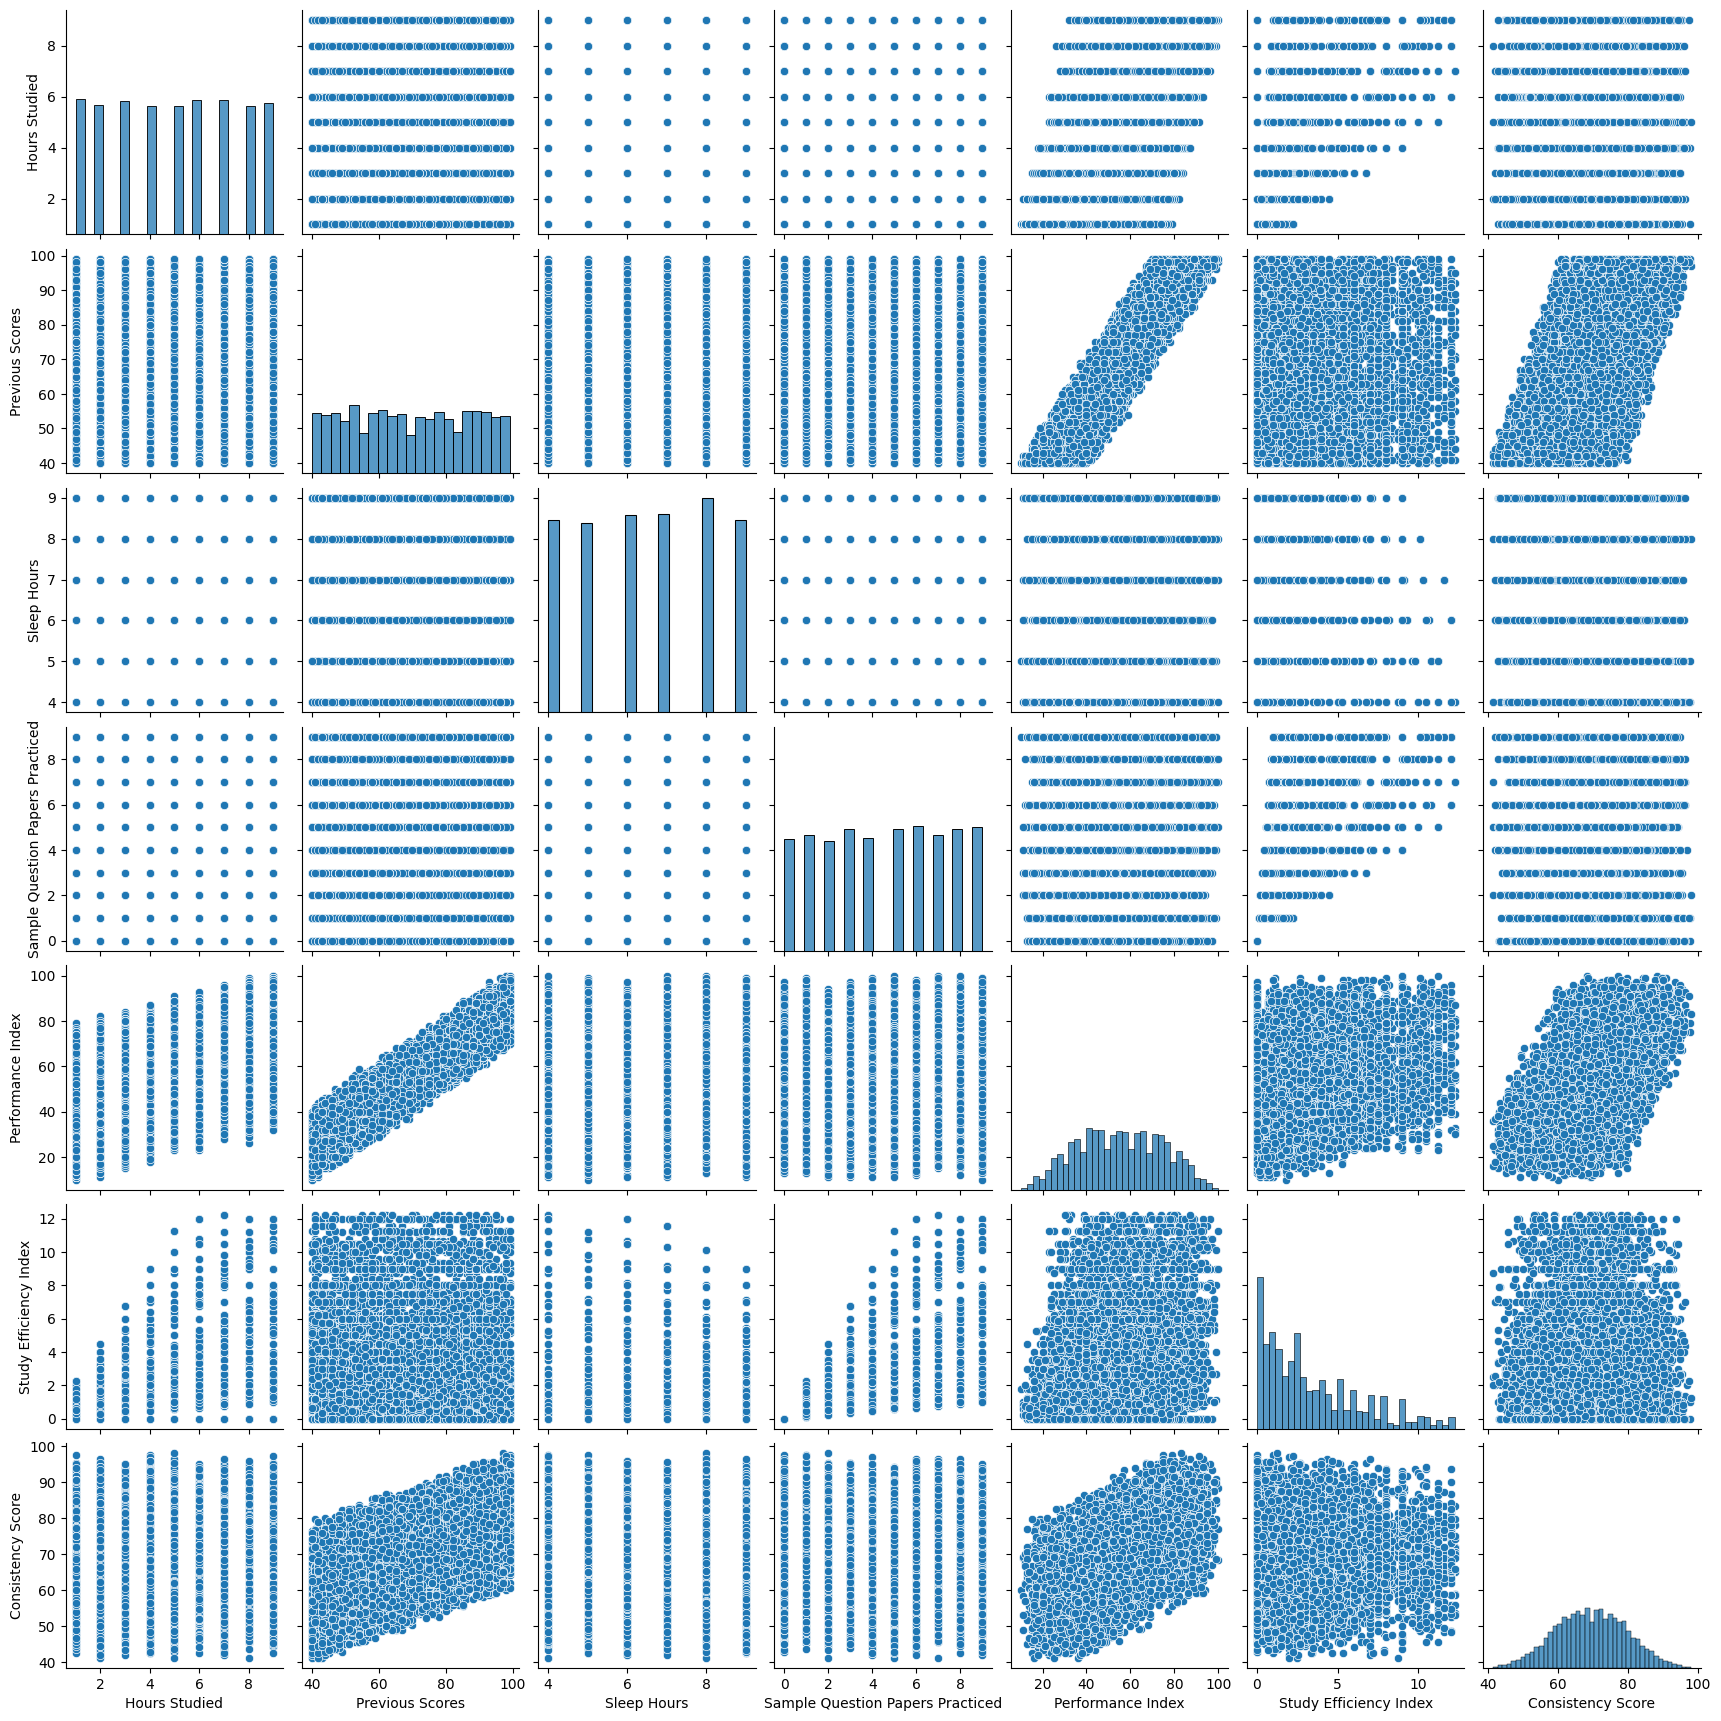

In [20]:
# Pairplot for selected numerical features
df_n = df.drop('Extracurricular Activities', axis=1)
sns.pairplot(df_n)
plt.show()

CORRELATION MATRIX

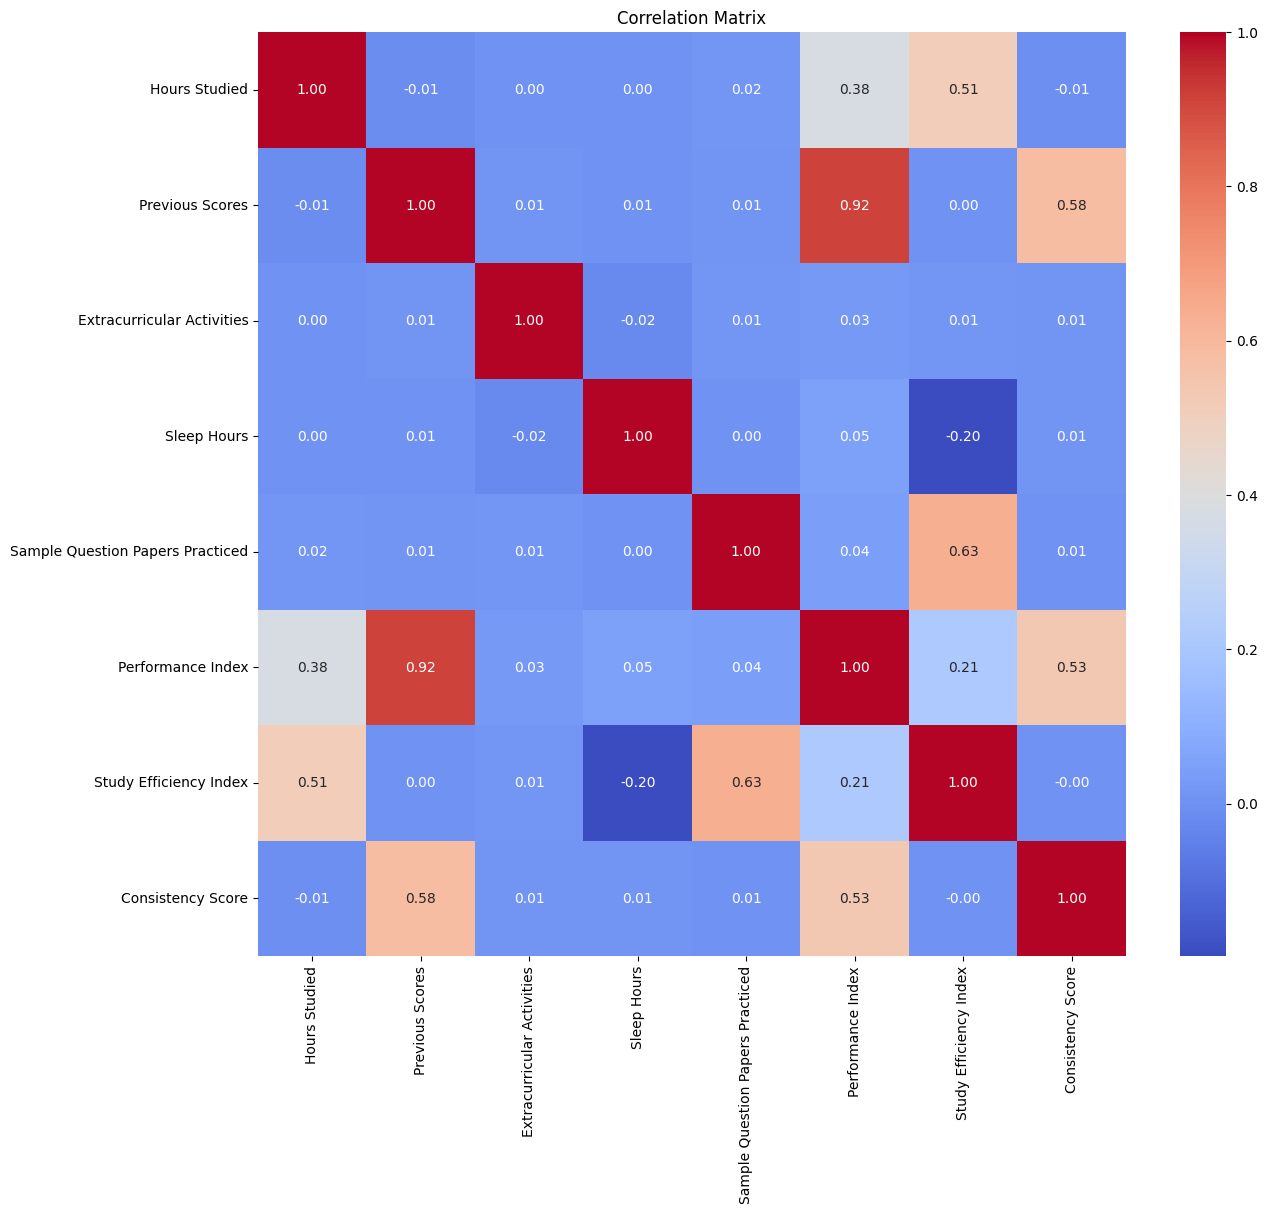

In [21]:
correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(14,12 ))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

VIF SCORE FOR MULTICOLLINEARITY

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Making function for VIF calculation.
def cal_VIF(F):
   VIF = pd.DataFrame()
   VIF["variables"] = F.columns
   VIF["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]

   return(VIF)

#Checking the VIF score of all the independent variables.
cal_VIF(df[[i for i in df.describe().columns if i not in ['Performance Index']]])

variables        VIF
0                     Hours Studied   8.316522
1                   Previous Scores  25.864994
2        Extracurricular Activities   1.955674
3                       Sleep Hours  14.722326
4  Sample Question Papers Practiced   7.926382
5            Study Efficiency Index   7.496266
6                 Consistency Score  40.791855

In [23]:
# consistency score has highest VIF, so removing that column from the dataset.
df = df.drop('Consistency Score', axis=1)
df

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0               7.0             99.0                           1          9.0   
1               4.0             82.0                           0          4.0   
2               8.0             51.0                           1          7.0   
3               5.0             52.0                           1          5.0   
4               7.0             75.0                           0          8.0   
...             ...              ...                         ...          ...   
9995            1.0             49.0                           1          4.0   
9996            7.0             64.0                           1          8.0   
9997            6.0             83.0                           1          8.0   
9998            9.0             97.0                           1          7.0   
9999            7.0             74.0                           0          8.0   

      Sample Question Papers Practiced  Performance Index  \
0                                  1.0               91.0   
1                                  2.0               65.0   
2                                  2.0               45.0   
3                                  2.0               36.0   
4                                  5.0               66.0   
...                                ...                ...   
9995                               2.0               23.0   
9996                               5.0               58.0   
9997                               5.0               74.0   
9998                               0.0               95.0   
9999                               1.0               64.0   

      Study Efficiency Index  
0                   0.777778  
1                   2.000000  
2                   2.285714  
3                   2.000000  
4                   4.375000  
...                      ...  
9995                0.500000  
9996                4.375000  
9997                3.750000  
9998                0.000000  
9999                0.875000  

[9873 rows x 7 columns]

In [24]:
# calculating vif scores again
#Checking the VIF score of all the independent variables.
cal_VIF(df[[i for i in df.describe().columns if i not in ['Performance Index']]])

variables        VIF
0                     Hours Studied   8.096401
1                   Previous Scores  10.119867
2        Extracurricular Activities   1.929554
3                       Sleep Hours  12.061786
4  Sample Question Papers Practiced   7.817995
5            Study Efficiency Index   7.495216

SPLITTING DATA INTO TRAIN, VALIDATION AND TEST

In [25]:
# Split data into training (60%), testing (20%), and validation (20%) sets
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)
test_data, val_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Save the datasets as CSV files
train_data.to_csv('4_train.csv', index=False)
test_data.to_csv('4_test.csv', index=False)
val_data.to_csv('4_val.csv', index=False)

MULTILINEAR REGRESSION

In [26]:
df_train = pd.read_csv('4_train.csv')
df_val = pd.read_csv('4_val.csv')
df_test = pd.read_csv('4_test.csv')

In [27]:
feature1 = "Previous Scores"
feature2 = "Hours Studied"
feature3 = "Study Efficiency Index"
feature4 = "Sleep Hours"
feature5 = "Sample Question Papers Practiced"
feature6 = "Extracurricular Activities"

model1 (Top feature),
model2 (Top 2 features),
model3 (Top 3 features),
model4 (All features),

Model1 (only top feature)

RMSE (Training data) = 7.7259
RMSE (Validation data) = 7.7991
RMSE (Test data) = 7.7490


R2-Score on training data: 0.8386
R2-Score on validation data: 0.8307
R2-Score on test data: 0.8402


Adjusted R2-Score on training data: 0.8385
Adjusted R2-Score on validation data: 0.8307
Adjusted R2-Score on test data: 0.8401




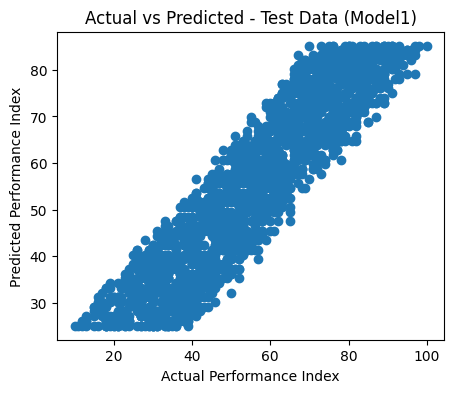

In [28]:
print("Model1 (only top feature)\n")

X_train1 = df_train[[feature1]]
y_train1 = df_train['Performance Index']
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

X_val1 = df_val[[feature1]]
y_val1 = df_val['Performance Index']
X_test1 = df_test[[feature1]]
y_test1 = df_test['Performance Index']

y_train_pred1 = model1.predict(X_train1)
y_val_pred1 = model1.predict(X_val1)
y_test_pred1 = model1.predict(X_test1)

rmse_train1 = np.sqrt(mean_squared_error(y_train1, y_train_pred1))
rmse_val1 = np.sqrt(mean_squared_error(y_val1, y_val_pred1))
rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_test_pred1))
print(f"RMSE (Training data) = {rmse_train1:.4f}")
print(f"RMSE (Validation data) = {rmse_val1:.4f}")
print(f"RMSE (Test data) = {rmse_test1:.4f}")
print("\n")

r2_train1 = r2_score(y_train1, y_train_pred1)
r2_val1 = r2_score(y_val1, y_val_pred1)
r2_test1 = r2_score(y_test1, y_test_pred1)
print(f"R2-Score on training data: {r2_train1:.4f}")
print(f"R2-Score on validation data: {r2_val1:.4f}")
print(f"R2-Score on test data: {r2_test1:.4f}")
print("\n")

# Function to compute Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Compute Adjusted R² scores
adj_r2_train1 = adjusted_r2(r2_train1, X_train1.shape[0], X_train1.shape[1])
adj_r2_val1 = adjusted_r2(r2_val1, X_val1.shape[0], X_val1.shape[1])
adj_r2_test1 = adjusted_r2(r2_test1, X_test1.shape[0], X_test1.shape[1])

print(f"Adjusted R2-Score on training data: {adj_r2_train1:.4f}")
print(f"Adjusted R2-Score on validation data: {adj_r2_val1:.4f}")
print(f"Adjusted R2-Score on test data: {adj_r2_test1:.4f}")
print("\n")

# Scatter plot: Actual vs Predicted on test data
plt.figure(figsize=(5, 4))
plt.scatter(y_test1, y_test_pred1)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted - Test Data (Model1)')
plt.show()

Model2 (top 2 features)

RMSE (Training data) = 2.2600
RMSE (Validation data) = 2.3130
RMSE (Test data) = 2.3533


R2-Score on training data: 0.9862
R2-Score on validation data: 0.9851
R2-Score on test data: 0.9853


Adjusted R2-Score on training data: 0.9862
Adjusted R2-Score on validation data: 0.9851
Adjusted R2-Score on test data: 0.9852




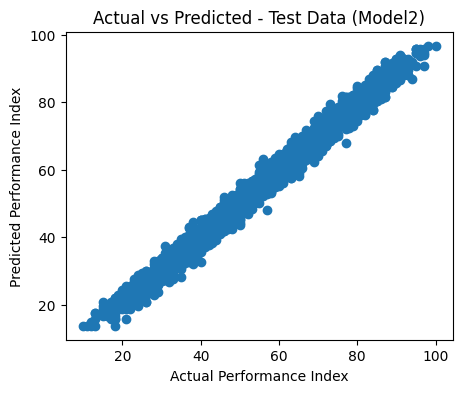

In [29]:
print("Model2 (top 2 features)\n")

X_train2 = df_train[[feature1, feature2]]
y_train2 = df_train['Performance Index']
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

X_val2 = df_val[[feature1, feature2]]
y_val2 = df_val['Performance Index']
X_test2 = df_test[[feature1, feature2]]
y_test2 = df_test['Performance Index']

y_train_pred2 = model2.predict(X_train2)
y_val_pred2 = model2.predict(X_val2)
y_test_pred2 = model2.predict(X_test2)

rmse_train2 = np.sqrt(mean_squared_error(y_train2, y_train_pred2))
rmse_val2 = np.sqrt(mean_squared_error(y_val2, y_val_pred2))
rmse_test2 = np.sqrt(mean_squared_error(y_test2, y_test_pred2))
print(f"RMSE (Training data) = {rmse_train2:.4f}")
print(f"RMSE (Validation data) = {rmse_val2:.4f}")
print(f"RMSE (Test data) = {rmse_test2:.4f}")
print("\n")

r2_train2 = r2_score(y_train2, y_train_pred2)
r2_val2 = r2_score(y_val2, y_val_pred2)
r2_test2 = r2_score(y_test2, y_test_pred2)
print(f"R2-Score on training data: {r2_train2:.4f}")
print(f"R2-Score on validation data: {r2_val2:.4f}")
print(f"R2-Score on test data: {r2_test2:.4f}")
print("\n")

# Function to compute Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Compute Adjusted R² scores
adj_r2_train2 = adjusted_r2(r2_train2, X_train2.shape[0], X_train2.shape[1])
adj_r2_val2 = adjusted_r2(r2_val2, X_val2.shape[0], X_val2.shape[1])
adj_r2_test2 = adjusted_r2(r2_test2, X_test2.shape[0], X_test2.shape[1])

print(f"Adjusted R2-Score on training data: {adj_r2_train2:.4f}")
print(f"Adjusted R2-Score on validation data: {adj_r2_val2:.4f}")
print(f"Adjusted R2-Score on test data: {adj_r2_test2:.4f}")
print("\n")

# Scatter plot: Actual vs Predicted on test data
plt.figure(figsize=(5, 4))
plt.scatter(y_test2, y_test_pred2)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted - Test Data (Model2)')
plt.show()

Model3 (top 3 features)

RMSE (Training data) = 2.2498
RMSE (Validation data) = 2.3013
RMSE (Test data) = 2.3437


R2-Score on training data: 0.9863
R2-Score on validation data: 0.9853
R2-Score on test data: 0.9854


Adjusted R2-Score on training data: 0.9863
Adjusted R2-Score on validation data: 0.9852
Adjusted R2-Score on test data: 0.9854




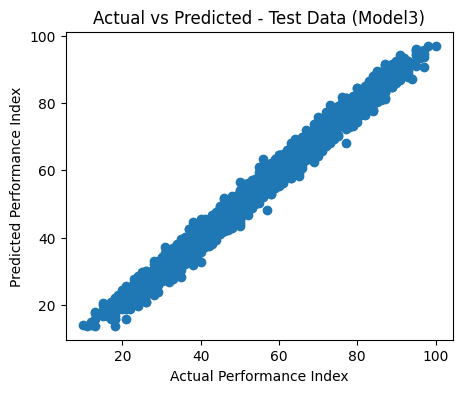

In [30]:
print("Model3 (top 3 features)\n")

X_train3 = df_train[[feature1, feature2, feature3]]
y_train3 = df_train['Performance Index']
model3 = LinearRegression()
model3.fit(X_train3, y_train3)

X_val3 = df_val[[feature1, feature2, feature3]]
y_val3 = df_val['Performance Index']
X_test3 = df_test[[feature1, feature2, feature3]]
y_test3 = df_test['Performance Index']

y_train_pred3 = model3.predict(X_train3)
y_val_pred3 = model3.predict(X_val3)
y_test_pred3 = model3.predict(X_test3)

rmse_train3 = np.sqrt(mean_squared_error(y_train3, y_train_pred3))
rmse_val3 = np.sqrt(mean_squared_error(y_val3, y_val_pred3))
rmse_test3 = np.sqrt(mean_squared_error(y_test3, y_test_pred3))
print(f"RMSE (Training data) = {rmse_train3:.4f}")
print(f"RMSE (Validation data) = {rmse_val3:.4f}")
print(f"RMSE (Test data) = {rmse_test3:.4f}")
print("\n")

r2_train3 = r2_score(y_train3, y_train_pred3)
r2_val3 = r2_score(y_val3, y_val_pred3)
r2_test3 = r2_score(y_test3, y_test_pred3)
print(f"R2-Score on training data: {r2_train3:.4f}")
print(f"R2-Score on validation data: {r2_val3:.4f}")
print(f"R2-Score on test data: {r2_test3:.4f}")
print("\n")

# Function to compute Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Compute Adjusted R² scores
adj_r2_train3 = adjusted_r2(r2_train3, X_train3.shape[0], X_train3.shape[1])
adj_r2_val3 = adjusted_r2(r2_val3, X_val3.shape[0], X_val3.shape[1])
adj_r2_test3 = adjusted_r2(r2_test3, X_test3.shape[0], X_test3.shape[1])

print(f"Adjusted R2-Score on training data: {adj_r2_train3:.4f}")
print(f"Adjusted R2-Score on validation data: {adj_r2_val3:.4f}")
print(f"Adjusted R2-Score on test data: {adj_r2_test3:.4f}")
print("\n")

# Scatter plot: Actual vs Predicted on test data
plt.figure(figsize=(5, 4))
plt.scatter(y_test3, y_test_pred3)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted - Test Data (Model3)')
plt.show()

Model4 (all features)

RMSE (Training data) = 2.0282
RMSE (Validation data) = 2.0676
RMSE (Test data) = 2.0685


R2-Score on training data: 0.9889
R2-Score on validation data: 0.9881
R2-Score on test data: 0.9886


Adjusted R2-Score on training data: 0.9889
Adjusted R2-Score on validation data: 0.9881
Adjusted R2-Score on test data: 0.9886




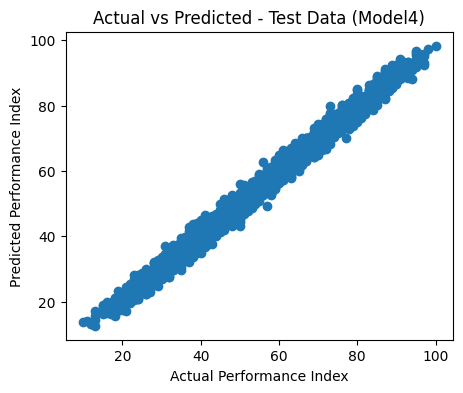

In [31]:
print("Model4 (all features)\n")

X_train4 = df_train[[feature1, feature2, feature3, feature4, feature5, feature6]]
y_train4 = df_train['Performance Index']
model4 = LinearRegression()
model4.fit(X_train4, y_train4)

X_val4 = df_val[[feature1, feature2, feature3, feature4, feature5, feature6]]
y_val4 = df_val['Performance Index']
X_test4 = df_test[[feature1, feature2, feature3, feature4, feature5, feature6]]
y_test4 = df_test['Performance Index']

y_train_pred4 = model4.predict(X_train4)
y_val_pred4 = model4.predict(X_val4)
y_test_pred4 = model4.predict(X_test4)

rmse_train4 = np.sqrt(mean_squared_error(y_train4, y_train_pred4))
rmse_val4 = np.sqrt(mean_squared_error(y_val4, y_val_pred4))
rmse_test4 = np.sqrt(mean_squared_error(y_test4, y_test_pred4))
print(f"RMSE (Training data) = {rmse_train4:.4f}")
print(f"RMSE (Validation data) = {rmse_val4:.4f}")
print(f"RMSE (Test data) = {rmse_test4:.4f}")
print("\n")

r2_train4 = r2_score(y_train4, y_train_pred4)
r2_val4 = r2_score(y_val4, y_val_pred4)
r2_test4 = r2_score(y_test4, y_test_pred4)
print(f"R2-Score on training data: {r2_train4:.4f}")
print(f"R2-Score on validation data: {r2_val4:.4f}")
print(f"R2-Score on test data: {r2_test4:.4f}")
print("\n")

# Function to compute Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Compute Adjusted R² scores
adj_r2_train4 = adjusted_r2(r2_train4, X_train4.shape[0], X_train4.shape[1])
adj_r2_val4 = adjusted_r2(r2_val4, X_val4.shape[0], X_val4.shape[1])
adj_r2_test4 = adjusted_r2(r2_test4, X_test4.shape[0], X_test4.shape[1])

print(f"Adjusted R2-Score on training data: {adj_r2_train4:.4f}")
print(f"Adjusted R2-Score on validation data: {adj_r2_val4:.4f}")
print(f"Adjusted R2-Score on test data: {adj_r2_test4:.4f}")
print("\n")

# Scatter plot: Actual vs Predicted on test data
plt.figure(figsize=(5, 4))
plt.scatter(y_test4, y_test_pred4)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted - Test Data (Model4)')
plt.show()

In [33]:
# Define the structure of the table
data = {
    "Features": [
        "Top 1",
        "Top 2",
        "Top 3",
        "All",
    ],
    "Standardized?": ["No", "No", "No", "No"],
    "Train RMSE": [rmse_train1, rmse_train2, rmse_train3, rmse_train4],
    "Val RMSE": [rmse_val1, rmse_val2, rmse_val3, rmse_val4],
    "Test RMSE": [rmse_test1, rmse_test2, rmse_test3, rmse_test4],
    "Train R²": [r2_train1, r2_train2, r2_train3, r2_train4],
    "Val R²": [r2_val1, r2_val2, r2_val3, r2_val4],
    "Test R²": [r2_test1, r2_test2, r2_test3, r2_test4],
}

# Create the DataFrame
data_frame1 = pd.DataFrame(data)

# Display the table
print(data_frame1.to_string(index=False))

# save to CSV
data_frame1.to_csv("linear_reg_model_comparison.csv", index=False)


Features Standardized?  Train RMSE  Val RMSE  Test RMSE  Train R²   Val R²  Test R²
   Top 1            No    7.725933  7.799050   7.748984  0.838568 0.830736 0.840163
   Top 2            No    2.260016  2.313041   2.353335  0.986186 0.985112 0.985258
   Top 3            No    2.249811  2.301314   2.343674  0.986311 0.985262 0.985379
     All            No    2.028211  2.067573   2.068452  0.988875 0.988104 0.988611


Best performing model from above is Model4, which uses all the features.

RMSE (Training data) = 2.028211
RMSE (Validation data) = 2.067573
RMSE (Test data) = 2.068452


R2-Score on training data: 0.988875
R2-Score on validation data: 0.988104
R2-Score on test data: 0.988611


Adjusted R2-Score on training data: 0.988863
Adjusted R2-Score on validation data: 0.988068
Adjusted R2-Score on test data: 0.988576




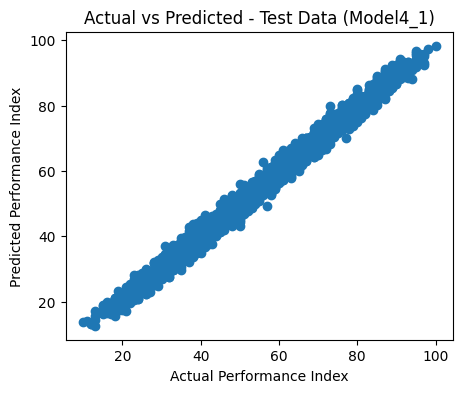

In [36]:
# standardising
scaler = StandardScaler()
X_train4_scaled = scaler.fit_transform(X_train4)
X_val4_scaled = scaler.transform(X_val4)
X_test4_scaled = scaler.transform(X_test4)

model4_1 = LinearRegression()
model4_1.fit(X_train4_scaled, y_train4)

y_train4_scaled_pred = model4_1.predict(X_train4_scaled)
y_val4_scaled_pred = model4_1.predict(X_val4_scaled)
y_test4_scaled_pred = model4_1.predict(X_test4_scaled)

rmse_train4_sc = np.sqrt(mean_squared_error(y_train4, y_train4_scaled_pred))
rmse_val4_sc = np.sqrt(mean_squared_error(y_val4, y_val4_scaled_pred))
rmse_test4_sc = np.sqrt(mean_squared_error(y_test4, y_test4_scaled_pred))
print(f"RMSE (Training data) = {rmse_train4_sc:.6f}")
print(f"RMSE (Validation data) = {rmse_val4_sc:.6f}")
print(f"RMSE (Test data) = {rmse_test4_sc:.6f}")
print("\n")

r2_train4_sc = r2_score(y_train4, y_train4_scaled_pred)
r2_val4_sc = r2_score(y_val4, y_val4_scaled_pred)
r2_test4_sc = r2_score(y_test4, y_test4_scaled_pred)
print(f"R2-Score on training data: {r2_train4_sc:.6f}")
print(f"R2-Score on validation data: {r2_val4_sc:.6f}")
print(f"R2-Score on test data: {r2_test4_sc:.6f}")
print("\n")

# Function to compute Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Compute Adjusted R² scores
adj_r2_train4_sc = adjusted_r2(r2_train4_sc, X_train4_scaled.shape[0], X_train4_scaled.shape[1])
adj_r2_val4_sc = adjusted_r2(r2_val4_sc, X_val4_scaled.shape[0], X_val4_scaled.shape[1])
adj_r2_test4_sc = adjusted_r2(r2_test4_sc, X_test4_scaled.shape[0], X_test4_scaled.shape[1])

print(f"Adjusted R2-Score on training data: {adj_r2_train4_sc:.6f}")
print(f"Adjusted R2-Score on validation data: {adj_r2_val4_sc:.6f}")
print(f"Adjusted R2-Score on test data: {adj_r2_test4_sc:.6f}")
print("\n")

# Scatter plot: Actual vs Predicted on test data
plt.figure(figsize=(5, 4))
plt.scatter(y_test4, y_test4_scaled_pred)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted - Test Data (Model4_1)')
plt.show()

RANDOM FOREST REGRESSOR

Random Forest Regressor (all features)

Accuracy: 0.9851106129881195
R2-Score on training data: 0.9889
R2-Score on validation data: 0.9881
R2-Score on test data: 0.9886


RMSE (Training data) = 0.9294
RMSE (Validation data) = 2.3769
RMSE (Test data) = 2.3651


Adjusted R2-Score on training data: 0.98886
Adjusted R2-Score on validation data: 0.98807
Adjusted R2-Score on test data: 0.98858




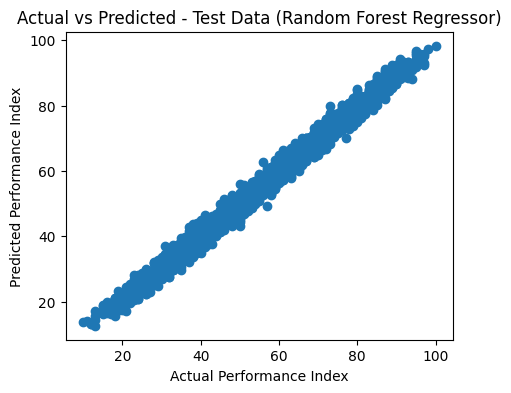

In [37]:
# for all features
print("Random Forest Regressor (all features)\n")

rfg = RandomForestRegressor(n_estimators=100, random_state=42)
rfg.fit(X_train4, y_train4)
print("Accuracy:", rfg.score(X_test4, y_test4))

# Predict and evaluate
y_train_pred_rfg = rfg.predict(X_train4)
y_val_pred_rfg = rfg.predict(X_val4)
y_test_pred_rfg = rfg.predict(X_test4)

r2_train_rfg = r2_score(y_train4, y_train_pred4)
r2_val_rfg = r2_score(y_val4, y_val_pred4)
r2_test_rfg = r2_score(y_test4, y_test_pred4)

print(f"R2-Score on training data: {r2_train_rfg:.4f}")
print(f"R2-Score on validation data: {r2_val_rfg:.4f}")
print(f"R2-Score on test data: {r2_test_rfg:.4f}")
print("\n")

rmse_train_rfg = np.sqrt(mean_squared_error(y_train4, y_train_pred_rfg))
rmse_val_rfg = np.sqrt(mean_squared_error(y_val4, y_val_pred_rfg))
rmse_test_rfg = np.sqrt(mean_squared_error(y_test4, y_test_pred_rfg))

print(f"RMSE (Training data) = {rmse_train_rfg:.4f}")
print(f"RMSE (Validation data) = {rmse_val_rfg:.4f}")
print(f"RMSE (Test data) = {rmse_test_rfg:.4f}")
print("\n")

# Function to compute Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Compute Adjusted R² scores
adj_r2_train_rfg = adjusted_r2(r2_train_rfg, X_train4.shape[0], X_train4.shape[1])
adj_r2_val_rfg = adjusted_r2(r2_val_rfg, X_val4.shape[0], X_val4.shape[1])
adj_r2_test_rfg = adjusted_r2(r2_test_rfg, X_test4.shape[0], X_test4.shape[1])

print(f"Adjusted R2-Score on training data: {adj_r2_train_rfg:.5f}")
print(f"Adjusted R2-Score on validation data: {adj_r2_val_rfg:.5f}")
print(f"Adjusted R2-Score on test data: {adj_r2_test_rfg:.5f}")
print("\n")

# Scatter plot: Actual vs Predicted on test data
plt.figure(figsize=(5, 4))
plt.scatter(y_test4, y_test_pred4)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted - Test Data (Random Forest Regressor)')
plt.show()

In [38]:
# for all features
print("XGBoost (all features)\n")

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train4, y_train4)
y_train_pred_xgb = xgb.predict(X_train4)
y_val_pred_xgb = xgb.predict(X_val4)
y_test_pred_xgb = xgb.predict(X_test4)

r2_train_xgb = xgb.score(X_train4, y_train4)
r2_val_xgb = xgb.score(X_val4, y_val4)
r2_test_xgb = xgb.score(X_test4, y_test4)

print(f"R2-Score on training data: {r2_train_xgb:.4f}")
print(f"R2-Score on validation data: {r2_val_xgb:.4f}")
print(f"R2-Score on test data: {r2_test_xgb:.4f}")
print("\n")

rmse_train_xgb = np.sqrt(mean_squared_error(y_train4, y_train_pred_xgb))
rmse_val_xgb = np.sqrt(mean_squared_error(y_val4, y_val_pred_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test4, y_test_pred_xgb))

print(f"RMSE (Training data) = {rmse_train_xgb:.4f}")
print(f"RMSE (Validation data) = {rmse_val_xgb:.4f}")
print(f"RMSE (Test data) = {rmse_test_xgb:.4f}")
print("\n")

# Function to compute Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Compute Adjusted R² scores
adj_r2_train_xgb = adjusted_r2(r2_train4, X_train4.shape[0], X_train4.shape[1])
adj_r2_val_xgb = adjusted_r2(r2_val4, X_val4.shape[0], X_val4.shape[1])
adj_r2_test_xgb = adjusted_r2(r2_test4, X_test4.shape[0], X_test4.shape[1])

print(f"Adjusted R2-Score on training data: {adj_r2_train_xgb:.5f}")
print(f"Adjusted R2-Score on validation data: {adj_r2_val_xgb:.5f}")
print(f"Adjusted R2-Score on test data: {adj_r2_test_xgb:.5f}")
print("\n")

XGBoost (all features)

R2-Score on training data: 0.9921
R2-Score on validation data: 0.9866
R2-Score on test data: 0.9874


RMSE (Training data) = 1.7080
RMSE (Validation data) = 2.1932
RMSE (Test data) = 2.1768


Adjusted R2-Score on training data: 0.98886
Adjusted R2-Score on validation data: 0.98807
Adjusted R2-Score on test data: 0.98858




CLUSTERING

In [39]:
X = df.drop('Performance Index', axis=1)
X

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0               7.0             99.0                           1          9.0   
1               4.0             82.0                           0          4.0   
2               8.0             51.0                           1          7.0   
3               5.0             52.0                           1          5.0   
4               7.0             75.0                           0          8.0   
...             ...              ...                         ...          ...   
9995            1.0             49.0                           1          4.0   
9996            7.0             64.0                           1          8.0   
9997            6.0             83.0                           1          8.0   
9998            9.0             97.0                           1          7.0   
9999            7.0             74.0                           0          8.0   

      Sample Question Papers Practiced  Study Efficiency Index  
0                                  1.0                0.777778  
1                                  2.0                2.000000  
2                                  2.0                2.285714  
3                                  2.0                2.000000  
4                                  5.0                4.375000  
...                                ...                     ...  
9995                               2.0                0.500000  
9996                               5.0                4.375000  
9997                               5.0                3.750000  
9998                               0.0                0.000000  
9999                               1.0                0.875000  

[9873 rows x 6 columns]

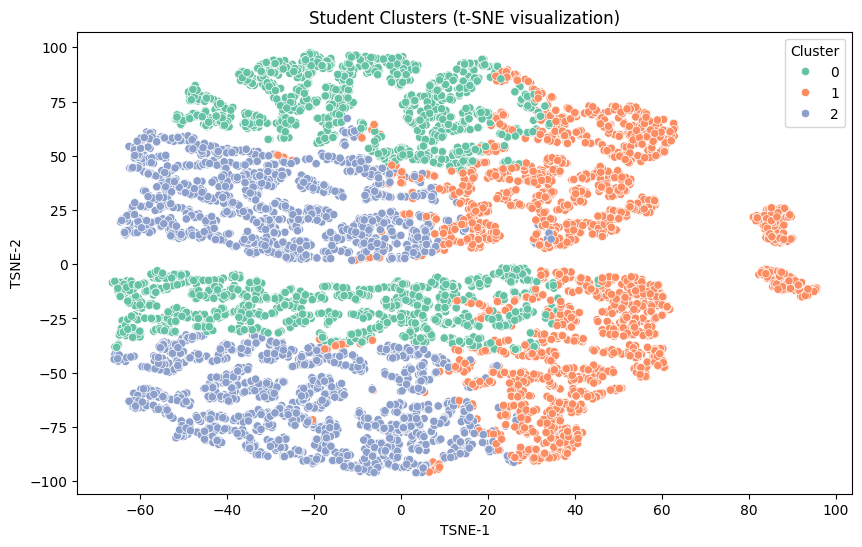

In [40]:
# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X_scaled)

df['TSNE-1'] = X_embedded[:, 0]
df['TSNE-2'] = X_embedded[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TSNE-1', y='TSNE-2', hue='Cluster', palette='Set2')
plt.title("Student Clusters (t-SNE visualization)")
plt.show()

In [41]:
# Analyze means of each cluster
cluster_means = df.groupby('Cluster')[X.columns].mean()
print(cluster_means)

         Hours Studied  Previous Scores  Extracurricular Activities  \
Cluster                                                               
0             3.854665        69.354839                    0.501908   
1             6.904262        69.329216                    0.508030   
2             4.215885        69.603945                    0.478412   

         Sleep Hours  Sample Question Papers Practiced  Study Efficiency Index  
Cluster                                                                         
0           5.034686                          3.176552                1.895751  
1           6.093267                          6.888820                6.852617  
2           8.060235                          3.673774                1.625702  


HYBRID PIPELINE

In [42]:
df

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0               7.0             99.0                           1          9.0   
1               4.0             82.0                           0          4.0   
2               8.0             51.0                           1          7.0   
3               5.0             52.0                           1          5.0   
4               7.0             75.0                           0          8.0   
...             ...              ...                         ...          ...   
9995            1.0             49.0                           1          4.0   
9996            7.0             64.0                           1          8.0   
9997            6.0             83.0                           1          8.0   
9998            9.0             97.0                           1          7.0   
9999            7.0             74.0                           0          8.0   

      Sample Question Papers Practiced  Performance Index  \
0                                  1.0               91.0   
1                                  2.0               65.0   
2                                  2.0               45.0   
3                                  2.0               36.0   
4                                  5.0               66.0   
...                                ...                ...   
9995                               2.0               23.0   
9996                               5.0               58.0   
9997                               5.0               74.0   
9998                               0.0               95.0   
9999                               1.0               64.0   

      Study Efficiency Index  Cluster     TSNE-1     TSNE-2  
0                   0.777778        2 -51.661621  12.597818  
1                   2.000000        0 -32.137764  -8.643144  
2                   2.285714        2 -31.724367  49.972385  
3                   2.000000        0   1.719872  76.986946  
4                   4.375000        2  18.996733 -77.508324  
...                      ...      ...        ...        ...  
9995                0.500000        0 -35.362930  88.338982  
9996                4.375000        2   2.078596  19.123407  
9997                3.750000        2  -7.315626  15.817532  
9998                0.000000        2 -12.314861  67.236443  
9999                0.875000        2 -37.480587 -49.207813  

[9873 rows x 10 columns]

In [43]:
# Prepare data
features = ['Hours Studied', 'Previous Scores', 'Sleep Hours',
            'Sample Question Papers Practiced', 'Study Efficiency Index',
            'Extracurricular Activities']

X = df[features]  # features used for clustering
y = df['Performance Index']  # regression target
clusters = df['Cluster']     # target for classification step

# Split dataset
X_train, X_test, y_train, y_test, cluster_train, cluster_test = train_test_split(
    X, y, clusters, test_size=0.2, random_state=42
)

# Train classifier (to predict clusters from features)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, cluster_train)

# Train a separate regressor for each cluster
regressors = {}
for cluster_label in cluster_train.unique():
    mask = cluster_train == cluster_label
    X_c = X_train[mask]
    y_c = y_train[mask]
    reg = RandomForestRegressor(random_state=42)
    reg.fit(X_c, y_c)
    regressors[cluster_label] = reg

# Predict on test data
cluster_preds = clf.predict(X_test)

final_preds = []
for i, row in enumerate(X_test.iterrows()):
    x = row[1].to_frame().T  # preserves column names
    cluster_label = cluster_preds[i]
    pred = regressors[cluster_label].predict(x)[0]
    final_preds.append(pred)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, final_preds))
print(f"Hybrid Model RMSE: {rmse:.2f}")


Hybrid Model RMSE: 2.43


SHAP ANALYSIS (for the hybrid model)

ExactExplainer explainer: 2607it [03:49, 11.09it/s]                          


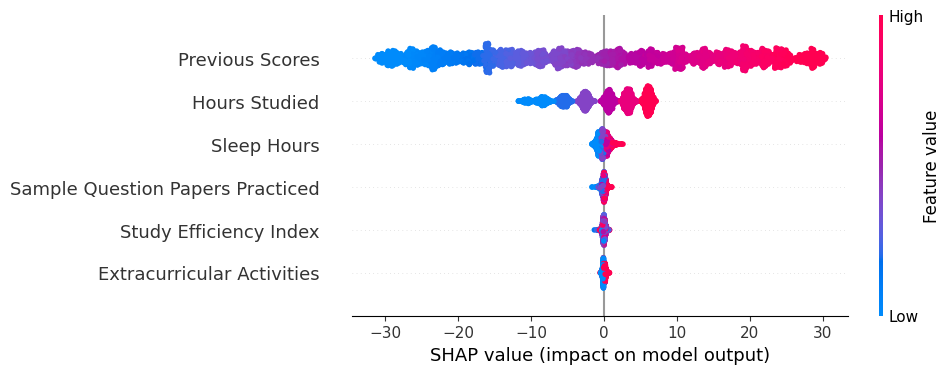

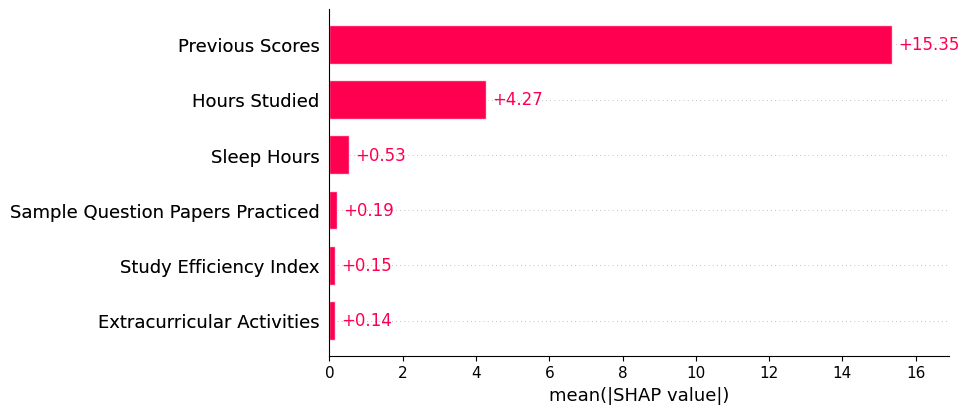

In [44]:
import shap

# Pick one trained regressor (here, for cluster 1)
reg = regressors[1]

# Use a sample from X_train[cluster == 1]
cluster_mask = cluster_train == 1
X_cluster = X_train[cluster_mask]

# Create SHAP explainer
explainer = shap.Explainer(reg.predict, X_cluster)
shap_values = explainer(X_cluster)

# Visualize
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)


SHAP ANALYSIS (for Random Forest)

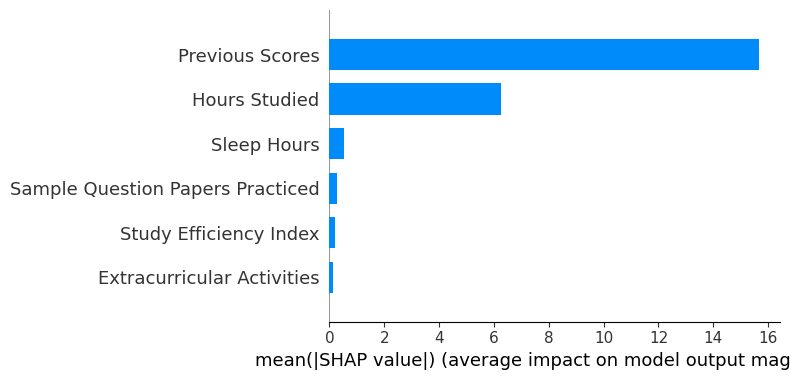

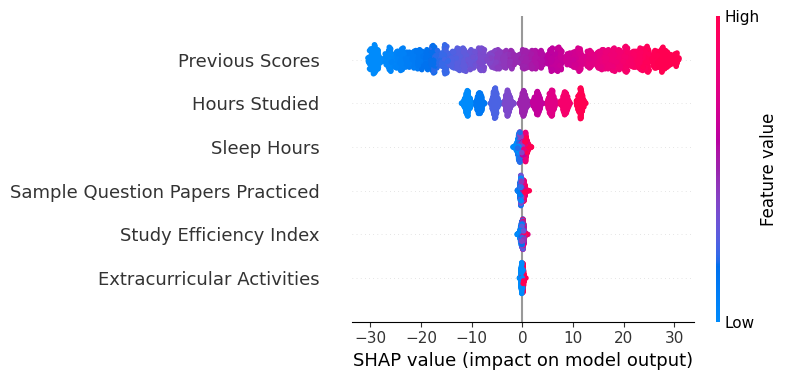

In [45]:
# SHAP analysis for Random Forest
explainer_rfg = shap.TreeExplainer(rfg)
shap_values_rfg = explainer_rfg.shap_values(X_test4)

# Summary plot
shap.summary_plot(shap_values_rfg, X_test4, plot_type="bar")  # feature importance bar chart
shap.summary_plot(shap_values_rfg, X_test4)  # beeswarm plot


SHAP ANALYSIS (for XGBoost)

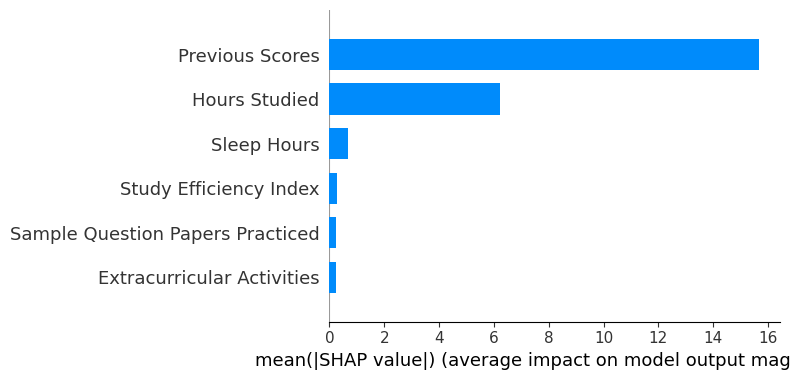

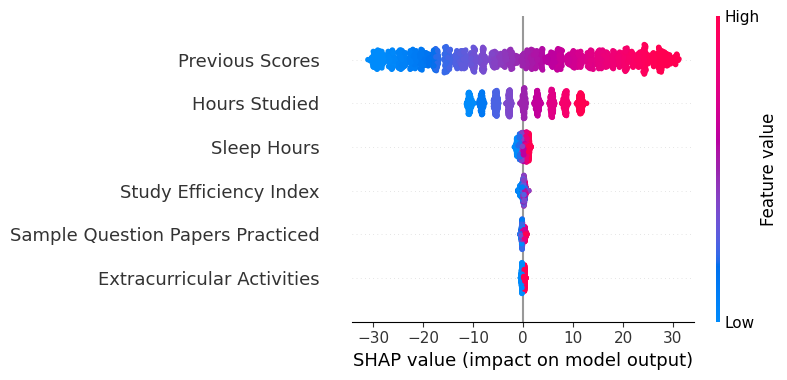

In [46]:
# SHAP analysis for XGBoost
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test4)

# Summary plot
shap.summary_plot(shap_values_xgb, X_test4, plot_type="bar")
shap.summary_plot(shap_values_xgb, X_test4)

In [47]:
df

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0               7.0             99.0                           1          9.0   
1               4.0             82.0                           0          4.0   
2               8.0             51.0                           1          7.0   
3               5.0             52.0                           1          5.0   
4               7.0             75.0                           0          8.0   
...             ...              ...                         ...          ...   
9995            1.0             49.0                           1          4.0   
9996            7.0             64.0                           1          8.0   
9997            6.0             83.0                           1          8.0   
9998            9.0             97.0                           1          7.0   
9999            7.0             74.0                           0          8.0   

      Sample Question Papers Practiced  Performance Index  \
0                                  1.0               91.0   
1                                  2.0               65.0   
2                                  2.0               45.0   
3                                  2.0               36.0   
4                                  5.0               66.0   
...                                ...                ...   
9995                               2.0               23.0   
9996                               5.0               58.0   
9997                               5.0               74.0   
9998                               0.0               95.0   
9999                               1.0               64.0   

      Study Efficiency Index  Cluster     TSNE-1     TSNE-2  
0                   0.777778        2 -51.661621  12.597818  
1                   2.000000        0 -32.137764  -8.643144  
2                   2.285714        2 -31.724367  49.972385  
3                   2.000000        0   1.719872  76.986946  
4                   4.375000        2  18.996733 -77.508324  
...                      ...      ...        ...        ...  
9995                0.500000        0 -35.362930  88.338982  
9996                4.375000        2   2.078596  19.123407  
9997                3.750000        2  -7.315626  15.817532  
9998                0.000000        2 -12.314861  67.236443  
9999                0.875000        2 -37.480587 -49.207813  

[9873 rows x 10 columns]

In [49]:
X_train4

Previous Scores  Hours Studied  Study Efficiency Index  Sleep Hours  \
0                48.0            2.0                4.000000          4.0   
1                80.0            9.0                7.200000          5.0   
2                87.0            4.0                0.800000          5.0   
3                51.0            8.0                9.600000          5.0   
4                65.0            2.0                0.000000          6.0   
...               ...            ...                     ...          ...   
5918             46.0            2.0                1.666667          6.0   
5919             60.0            9.0                6.750000          4.0   
5920             95.0            5.0                6.000000          5.0   
5921             47.0            1.0                0.000000          9.0   
5922             84.0            9.0                5.625000          8.0   

      Sample Question Papers Practiced  Extracurricular Activities  
0                                  8.0                           0  
1                                  4.0                           1  
2                                  1.0                           1  
3                                  6.0                           0  
4                                  0.0                           0  
...                                ...                         ...  
5918                               5.0                           0  
5919                               3.0                           1  
5920                               6.0                           1  
5921                               0.0                           0  
5922                               5.0                           0  

[5923 rows x 6 columns]

RIDGE REGRESSION

Ridge Regression (all features)

Best alpha: 0.0001
R2 (Train): 0.9889, RMSE (Train): 2.0282
R2 (Val): 0.9881, RMSE (Val): 2.0676
R2 (Test): 0.9886, RMSE (Test): 2.0685




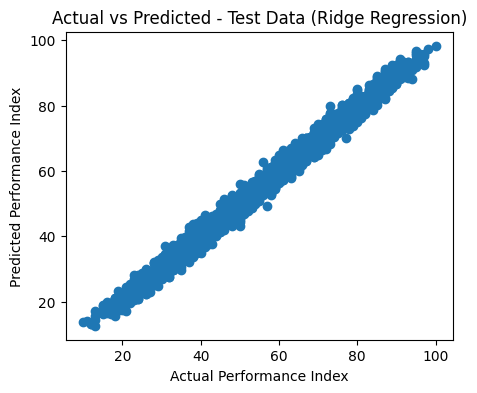

In [50]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

print("Ridge Regression (all features)\n")

# Pipeline: Scaling + Ridge
ridge_pipeline = make_pipeline(StandardScaler(), Ridge())

# Grid search over alpha
param_grid = {'ridge__alpha': np.logspace(-4, 4, 50)}
ridge_grid = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='r2')
ridge_grid.fit(X_train4, y_train4)

# Best model
best_ridge = ridge_grid.best_estimator_

# Predict on val/test
y_train_pred = best_ridge.predict(X_train4)
y_val_pred = best_ridge.predict(X_val4)
y_test_pred = best_ridge.predict(X_test4)

# Metrics
r2_train_ridge = r2_score(y_train4, y_train_pred)
r2_val_ridge = r2_score(y_val4, y_val_pred)
r2_test_ridge = r2_score(y_test4, y_test_pred)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train4, y_train_pred))
rmse_val_ridge = np.sqrt(mean_squared_error(y_val4, y_val_pred))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test4, y_test_pred))

print("Best alpha:", ridge_grid.best_params_['ridge__alpha'])
print(f"R2 (Train): {r2_train_ridge:.4f}, RMSE (Train): {rmse_train_ridge:.4f}")
print(f"R2 (Val): {r2_val_ridge:.4f}, RMSE (Val): {rmse_val_ridge:.4f}")
print(f"R2 (Test): {r2_test_ridge:.4f}, RMSE (Test): {rmse_test_ridge:.4f}")
print("\n")

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(5, 4))
plt.scatter(y_test4, y_test_pred)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted - Test Data (Ridge Regression)')
plt.show()

LASSO REGRESSION

Lasso Regression (all features)

Best alpha: 0.0062505519252739694
R2 (Train): 0.9889, RMSE (Train): 2.0283
R2 (Val): 0.9881, RMSE (Val): 2.0672
R2 (Test): 0.9886, RMSE (Test): 2.0697




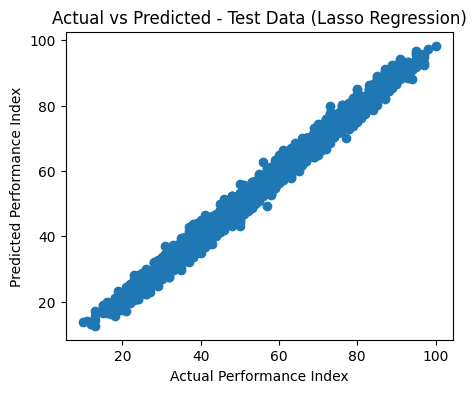

In [51]:
print("Lasso Regression (all features)\n")

# Pipeline: Scaling + Lasso
lasso_pipeline = make_pipeline(StandardScaler(), Lasso(max_iter=10000))

# Grid search over alpha
param_grid = {'lasso__alpha': np.logspace(-4, 4, 50)}
lasso_grid = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='r2')
lasso_grid.fit(X_train4, y_train4)

# Best model
best_lasso = lasso_grid.best_estimator_

# Predict on train/val/test
y_train_pred = best_lasso.predict(X_train4)
y_val_pred = best_lasso.predict(X_val4)
y_test_pred = best_lasso.predict(X_test4)

# Metrics
r2_train_lasso = r2_score(y_train4, y_train_pred)
r2_val_lasso = r2_score(y_val4, y_val_pred)
r2_test_lasso = r2_score(y_test4, y_test_pred)
rmse_train_lasso = np.sqrt(mean_squared_error(y_train4, y_train_pred))
rmse_val_lasso = np.sqrt(mean_squared_error(y_val4, y_val_pred))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test4, y_test_pred))

print("Best alpha:", lasso_grid.best_params_['lasso__alpha'])
print(f"R2 (Train): {r2_train_lasso:.4f}, RMSE (Train): {rmse_train_lasso:.4f}")
print(f"R2 (Val): {r2_val_lasso:.4f}, RMSE (Val): {rmse_val_lasso:.4f}")
print(f"R2 (Test): {r2_test_lasso:.4f}, RMSE (Test): {rmse_test_lasso:.4f}")
print("\n")

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(5, 4))
plt.scatter(y_test4, y_test_pred)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted - Test Data (Lasso Regression)')
plt.show()


MLP REGRESSION (Neural Network)

MLP Regression (all features)

Best parameters: {'mlpregressor__alpha': 0.001, 'mlpregressor__hidden_layer_sizes': (100, 50)}
R2 (Train): 0.9886, RMSE (Train): 2.0522
R2 (Val): 0.9872, RMSE (Val): 2.1481
R2 (Test): 0.9878, RMSE (Test): 2.1372


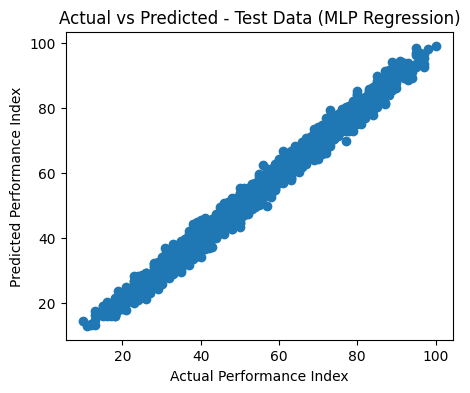

In [53]:
from sklearn.neural_network import MLPRegressor

print("MLP Regression (all features)\n")

# Define MLP pipeline
mlp_pipeline = make_pipeline(
    StandardScaler(),
    MLPRegressor(max_iter=1000, early_stopping=True, random_state=42)
)

# Parameter grid for tuning
param_grid = {
    'mlpregressor__hidden_layer_sizes': [(100,), (100, 50), (50, 25)],
    'mlpregressor__alpha': [0.0001, 0.001, 0.01, 0.1]
}

# GridSearchCV
mlp_grid = GridSearchCV(mlp_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
mlp_grid.fit(X_train4, y_train4)

# Best model
best_mlp = mlp_grid.best_estimator_

# Predict on train, val, test
y_train_pred = best_mlp.predict(X_train4)
y_val_pred = best_mlp.predict(X_val4)
y_test_pred = best_mlp.predict(X_test4)

# Metrics
r2_train_mlp = r2_score(y_train4, y_train_pred)
r2_val_mlp = r2_score(y_val4, y_val_pred)
r2_test_mlp = r2_score(y_test4, y_test_pred)
rmse_train_mlp = np.sqrt(mean_squared_error(y_train4, y_train_pred))
rmse_val_mlp = np.sqrt(mean_squared_error(y_val4, y_val_pred))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test4, y_test_pred))

# Print results
print("Best parameters:", mlp_grid.best_params_)
print(f"R2 (Train): {r2_train_mlp:.4f}, RMSE (Train): {rmse_train_mlp:.4f}")
print(f"R2 (Val): {r2_val_mlp:.4f}, RMSE (Val): {rmse_val_mlp:.4f}")
print(f"R2 (Test): {r2_test_mlp:.4f}, RMSE (Test): {rmse_test_mlp:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(5, 4))
plt.scatter(y_test4, y_test_pred)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted - Test Data (MLP Regression)')
plt.show()



In [54]:
# Define the structure of the table
data = {
    "Model": [
        "Linear Regression",
        "Linear Regression",
        "Ridge Regression",
        "Lasso Regression",
        "Random Forest",
        "XGBoost",
        "MLP"
    ],
    "Standardized?": ["No", "Yes", "Yes", "Yes", "No", "No", "Yes"],
    "Train RMSE": [rmse_train4, rmse_train4_sc, rmse_train_ridge, rmse_train_lasso, rmse_train_rfg, rmse_train_xgb, rmse_train_mlp],
    "Val RMSE": [rmse_val4, rmse_val4_sc, rmse_val_ridge, rmse_val_lasso, rmse_val_rfg, rmse_val_xgb, rmse_val_mlp],
    "Test RMSE": [rmse_test4, rmse_test4_sc, rmse_test_ridge, rmse_test_lasso, rmse_test_rfg, rmse_test_xgb, rmse_test_mlp],
    "Train R²": [r2_train4, r2_train4_sc, r2_train_ridge, r2_train_lasso, r2_train_rfg, r2_train_xgb, r2_train_mlp],
    "Val R²": [r2_val4, r2_val4_sc, r2_val_ridge, r2_val_lasso, r2_val_rfg, r2_val_xgb, r2_val_mlp],
    "Test R²": [r2_test4, r2_test4_sc, r2_test_ridge, r2_test_lasso, r2_test_rfg, r2_test_xgb, r2_test_mlp],
}

# Create the DataFrame
data_frame2 = pd.DataFrame(data)

# Display the table
print(data_frame2.to_string(index=False))

# Save to CSV
data_frame2.to_csv("model_comparison.csv", index=False)


            Model Standardized?  Train RMSE  Val RMSE  Test RMSE  Train R²   Val R²  Test R²
Linear Regression            No    2.028211  2.067573   2.068452  0.988875 0.988104 0.988611
Linear Regression           Yes    2.028211  2.067573   2.068452  0.988875 0.988104 0.988611
 Ridge Regression           Yes    2.028211  2.067573   2.068452  0.988875 0.988104 0.988611
 Lasso Regression           Yes    2.028309  2.067221   2.069716  0.988874 0.988108 0.988597
    Random Forest            No    0.929435  2.376916   2.365072  0.988875 0.988104 0.988611
          XGBoost            No    1.707994  2.193161   2.176791  0.992110 0.986615 0.987387
              MLP           Yes    2.052241  2.148147   2.137206  0.988609 0.987159 0.987841
